In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# 보여지는 컬럼 개수 지정
pd.set_option('display.max_columns', 30)

In [3]:
# 한글 폰트 지정
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 데이터 적재
data_cust = pd.read_csv('CUST_DATA.csv', encoding='utf-16', engine='python', sep=',')
data_claim = pd.read_csv('CLAIM_DATA.csv', encoding='utf-16', engine='python', sep=',')

In [5]:
data_cust.shape

(22400, 25)

In [6]:
data_cust.head()

CUST_ID  DIVIDED_SET SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
0        1            1           N    2   47      21111            20.0   
1        2            1           N    1   53      40000            20.0   
2        3            1           N    1   60          0             NaN   
3        4            1           N    2   64      12861            40.0   
4        5            1           N    2   54          0             NaN   

  FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2    TOTALPREM  MINCRDT  \
0         N   199910.0   충북      3.사무직        사무직  146980441.0      NaN   
1         N   199910.0   서울      3.사무직        사무직   94600109.0      1.0   
2         N   199910.0   서울      5.서비스   2차산업 종사자   18501269.0      NaN   
3         Y   199910.0   경기      2.자영업   3차산업 종사자  317223657.0      2.0   
4         Y   199910.0   광주      2.자영업   3차산업 종사자   10506072.0      8.0   

   MAXCRDT WEDD_YN MATE_OCCP_GRP_1 MATE_OCCP_GRP_2  CHLD_CNT  LTBN_CHLD_AGE  \
0      NaN       Y           3.사무직        2차산업 종사자       2.0           13.0   
1      6.0       Y            1.주부              주부       2.0           17.0   
2      NaN       N             NaN             NaN       0.0            0.0   
3     99.0       N             NaN             NaN       0.0            0.0   
4      8.0       Y           3.사무직          고위 공무원       3.0           19.0   

   MAX_PAYM_YM    MAX_PRM  CUST_INCM  RCBASE_HSHD_INCM  JPBASE_HSHD_INCM  
0     200811.0   319718.0     4879.0             10094           11337.0  
1     200012.0   341341.0     6509.0              9143            6509.0  
2     200305.0   131300.0     4180.0                 0            4180.0  
3     201009.0  1493184.0        NaN              4270            5914.0  
4     200807.0   166760.0     3894.0                 0            8885.0

### 1. 데이터 파악

In [7]:
# 결측치 확인
data_cust.isnull().sum()

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1254
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1            595
OCCP_GRP_2            595
TOTALPREM            5791
MINCRDT              9476
MAXCRDT              9476
WEDD_YN               473
MATE_OCCP_GRP_1     11827
MATE_OCCP_GRP_2     11827
CHLD_CNT              473
LTBN_CHLD_AGE         473
MAX_PAYM_YM          6486
MAX_PRM              6486
CUST_INCM            5263
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      680
dtype: int64

In [8]:
data_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119020 entries, 0 to 119019
Data columns (total 39 columns):
CUST_ID            119020 non-null int64
POLY_NO            119020 non-null int64
ACCI_OCCP_GRP1     117603 non-null object
ACCI_OCCP_GRP2     117603 non-null object
CHANG_FP_YN        119020 non-null object
CNTT_RECP_SQNO     119020 non-null int64
RECP_DATE          119020 non-null int64
ORIG_RESN_DATE     119020 non-null int64
RESN_DATE          119020 non-null int64
CRNT_PROG_DVSN     119020 non-null int64
ACCI_DVSN          119020 non-null int64
CAUS_CODE          119020 non-null object
CAUS_CODE_DTAL     119020 non-null object
DSAS_NAME          119020 non-null object
DMND_RESN_CODE     119020 non-null int64
DMND_RSCD_SQNO     119020 non-null int64
HOSP_OTPA_STDT     86449 non-null float64
HOSP_OTPA_ENDT     86449 non-null float64
RESL_CD1           119020 non-null object
RESL_NM1           119020 non-null object
VLID_HOSP_OTDA     119020 non-null int64
HOUSE_HOSP_DIST   

In [9]:
# 연속형 데이터 확인
data_cust.describe().columns

Index(['CUST_ID', 'DIVIDED_SET', 'SEX', 'AGE', 'RESI_COST', 'RESI_TYPE_CODE',
       'CUST_RGST', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'CHLD_CNT',
       'LTBN_CHLD_AGE', 'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM',
       'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM'],
      dtype='object')

In [10]:
data_claim.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN'],
      dtype='object')

## 범주형 데이터 확인
data_cust.describe(include='object').columns

In [11]:
data_cust.describe(include='object')

SIU_CUST_YN FP_CAREER   CTPR OCCP_GRP_1 OCCP_GRP_2 WEDD_YN  \
count        20607     22400  21779      21805      21805   21927   
unique           2         2     17          8         25       2   
top              N         N     경기       8.기타         주부       Y   
freq         18801     21182   5200       4879       4837   12010   

       MATE_OCCP_GRP_1 MATE_OCCP_GRP_2  
count            10573           10573  
unique               8              24  
top               1.주부              주부  
freq              2394            2402

In [12]:
data_cust.shape

(22400, 25)

In [13]:
# 사기자 분포 확인
data_cust['SIU_CUST_YN'].isnull().sum()

1793

In [14]:
len(data_cust['SIU_CUST_YN'])

22400

In [15]:
# value_counts() 기본동작 : NaN 제외하고 범주형 데이터에 대한 개수 반환
count1 = data_cust['SIU_CUST_YN'].value_counts()

In [16]:
count1.index = ['정상인', '사기자']
count1

정상인    18801
사기자     1806
Name: SIU_CUST_YN, dtype: int64

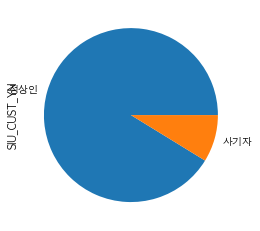

In [17]:
count1.plot(kind='pie')

In [18]:
# 결측(NaN) = 분석대상
count2 = data_cust['SIU_CUST_YN'].value_counts(dropna=False)
count2

N      18801
Y       1806
NaN     1793
Name: SIU_CUST_YN, dtype: int64

In [19]:
count2.index = ['General Customer', 'Swindler', 'Target']

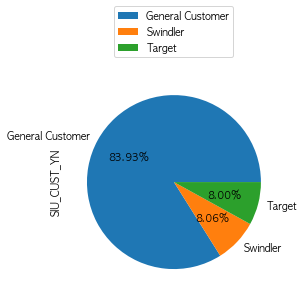

In [20]:
count2.plot(kind='pie', autopct='%.2f%%')
plt.legend(loc="lower center",bbox_to_anchor=(0.5, 1.05))

In [21]:
data_cust['AGE'].describe()

count    22400.000000
mean        44.734866
std         15.445707
min          2.000000
25%         34.000000
50%         46.000000
75%         56.000000
max         89.000000
Name: AGE, dtype: float64

In [22]:
# 나이대 구간 나누기
# 1. pd.cut(x, bins, labels) 
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = [0,10,20,30,40,50,60,70,80]
bins_list = [0,10, 20, 30, 40, 50, 60, 70, 80, 90]
label_list = [0,10,20,30,40,50,60,70,80]
tmp1 = pd.cut(data_cust['AGE'], bins=bins_list, labels=label_list)

In [23]:
tmp1.unique()

[40, 50, 60, 80, 30, 70, 20, 10, 0]
Categories (9, int64): [0 < 10 < 20 < 30 ... 50 < 60 < 70 < 80]

In [24]:
# 2. np.digitize(x, [10,20,30,40,50,60,70,80])
# 0,1,2,3,4,5,6,7,8
tmp2 = pd.Series(np.digitize(data_cust['AGE'], [10,20,30,40,50,60,70,80]))

In [25]:
tmp2.unique()

array([4, 5, 6, 8, 3, 7, 2, 1, 0])

In [26]:
def age_to_gen(age):
    age = int(age/10)
    return age

In [27]:
tmp3 = data_cust['AGE'].apply(age_to_gen)

In [28]:
tmp3.unique()

array([4, 5, 6, 8, 3, 7, 2, 1, 0])

In [29]:
# 1. pd.cut(x, bins, labels) 
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = [0,10,20,30,40,50,60,70,80]
bins_list = [0,10, 20, 30, 40, 50, 60, 70, 80, 90]
label_list = [0,10,20,30,40,50,60,70,80]
tmp1 = pd.cut(data_cust['AGE'], bins=bins_list, labels=label_list)

In [30]:
data_cust['AGE_GEN'] = pd.cut(data_cust['AGE'], bins=bins_list, labels=label_list)

In [31]:
data_cust['AGE_GEN']

0        40
1        50
2        50
3        60
4        50
5        60
6        50
7        50
8        50
9        50
10       60
11       50
12       50
13       60
14       40
15       60
16       50
17       60
18       50
19       80
20       50
21       40
22       50
23       50
24       60
25       30
26       50
27       50
28       50
29       40
         ..
22370    20
22371    20
22372    10
22373    20
22374    60
22375    10
22376    40
22377    30
22378    10
22379    10
22380    10
22381    30
22382    10
22383    10
22384    60
22385    20
22386    50
22387    10
22388    30
22389    20
22390    20
22391    50
22392    20
22393     0
22394    40
22395    30
22396    20
22397    20
22398    10
22399    10
Name: AGE_GEN, Length: 22400, dtype: category
Categories (9, int64): [0 < 10 < 20 < 30 ... 50 < 60 < 70 < 80]

In [32]:
data_cust.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'AGE_GEN'],
      dtype='object')

In [33]:
map_cols = ['SIU_CUST_YN', 'FP_CAREER', 'WEDD_YN']
data_cust[map_cols].describe()

SIU_CUST_YN FP_CAREER WEDD_YN
count        20607     22400   21927
unique           2         2       2
top              N         N       Y
freq         18801     21182   12010

In [34]:
# series.map(dict)

yn_map = {'Y':1, 'N':0}

for col in map_cols:
    data_cust[col] = data_cust[col].map(yn_map)

In [35]:
data_cust[map_cols].describe()

SIU_CUST_YN     FP_CAREER       WEDD_YN
count  20607.000000  22400.000000  21927.000000
mean       0.087640      0.054375      0.547727
std        0.282778      0.226761      0.497728
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      1.000000
75%        0.000000      0.000000      1.000000
max        1.000000      1.000000      1.000000

In [36]:
# RESI_TYPE_CODE, TOTALPREM : 결측치 처리 
# 원본 = data_cust

data_cust['RESI_TYPE_CODE'].unique()

array([20., nan, 40., 99., 30., 50., 12., 11., 13., 60., 70.])

In [37]:
data_cust['TOTALPREM'].describe().astype(int)

count         16609
mean       29982660
std        48974376
min             500
25%         6665459
50%        16224632
75%        34794388
max      1840052255
Name: TOTALPREM, dtype: int64

In [38]:
# RESI_TYPE_CODE, TOTALPREM
# ▶ 일괄 0으로 처리 = data_cust1
data_cust['RESI_TYPE_CODE'].isnull().sum()

1254

In [39]:
data_cust1 = data_cust.copy()

In [40]:
data_cust1['RESI_TYPE_CODE'].fillna(0, inplace=True)

In [41]:
data_cust1['RESI_TYPE_CODE'].isnull().sum()

0

In [42]:
data_cust1['TOTALPREM'].isnull().sum()

5791

In [43]:
data_cust1['TOTALPREM'].fillna(0, inplace=True)

In [44]:
data_cust1['TOTALPREM'].isnull().sum()

0

In [45]:
# ▶ 최빈값, 중위값으로 처리 = data_cust2

In [46]:
data_cust2 = data_cust.copy()

In [47]:
# 최빈값
resi_type_mode = data_cust2['RESI_TYPE_CODE'].mode()[0]

In [48]:
# 중위값
prem_median = data_cust2['TOTALPREM'].median()

In [49]:
data_cust2['TOTALPREM'].describe().astype(int).loc['50%']

16224632

In [50]:
data_cust2[['RESI_TYPE_CODE','TOTALPREM']].isnull().sum()

RESI_TYPE_CODE    1254
TOTALPREM         5791
dtype: int64

In [51]:
# 최빈값 : 범주형
data_cust2['RESI_TYPE_CODE'].fillna(resi_type_mode, inplace=True)
# 중위값 : 연속형
data_cust2['TOTALPREM'].fillna(prem_median, inplace=True)

In [52]:
data_cust2[['RESI_TYPE_CODE','TOTALPREM']].isnull().sum()

RESI_TYPE_CODE    0
TOTALPREM         0
dtype: int64

In [53]:
# MINCRDT, MAXCRDT : 결측치 처리
# ▶ 일괄 0으로 처리(data_cust1)
data_cust1['MINCRDT'].isnull().sum()

9476

In [54]:
data_cust1['MINCRDT'].fillna(0, inplace=True)

In [55]:
data_cust1['MINCRDT'].isnull().sum()

0

In [56]:
print(data_cust1['MAXCRDT'].isnull().sum())
data_cust1['MAXCRDT'].fillna(0, inplace=True)
print(data_cust1['MAXCRDT'].isnull().sum())

9476
0


In [57]:
# ▶ 중위값으로 처리(data_cust2)
data_cust2['MINCRDT'].median()

6.0

In [58]:
data_cust2['MAXCRDT'].median()

6.0

In [59]:
data_cust2['MAXCRDT'].fillna(6, inplace=True)
data_cust2['MINCRDT'].fillna(6, inplace=True)

In [60]:
data_cust2[['MINCRDT', 'MAXCRDT']].isnull().sum()

MINCRDT    0
MAXCRDT    0
dtype: int64

In [61]:
data_cust2.isnull().sum()

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE          0
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1            595
OCCP_GRP_2            595
TOTALPREM               0
MINCRDT                 0
MAXCRDT                 0
WEDD_YN               473
MATE_OCCP_GRP_1     11827
MATE_OCCP_GRP_2     11827
CHLD_CNT              473
LTBN_CHLD_AGE         473
MAX_PAYM_YM          6486
MAX_PRM              6486
CUST_INCM            5263
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      680
AGE_GEN                 0
dtype: int64

In [62]:
data_cust['CTPR'].unique()

array(['충북', '서울', '경기', '광주', '충남', '전북', '대구', '경북', '부산', '인천', '울산',
       '경남', '전남', '대전', '강원', nan, '제주', '세종'], dtype=object)

In [63]:
pd.notna(data_cust['CTPR'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [64]:
ctpr_list = data_cust['CTPR'].unique()[pd.notna(data_cust['CTPR'].unique())]
ctpr_list

array(['충북', '서울', '경기', '광주', '충남', '전북', '대구', '경북', '부산', '인천', '울산',
       '경남', '전남', '대전', '강원', '제주', '세종'], dtype=object)

In [65]:
ctpr_map = {v:k for k,v in enumerate(ctpr_list, 1)}
ctpr_map

{'충북': 1,
 '서울': 2,
 '경기': 3,
 '광주': 4,
 '충남': 5,
 '전북': 6,
 '대구': 7,
 '경북': 8,
 '부산': 9,
 '인천': 10,
 '울산': 11,
 '경남': 12,
 '전남': 13,
 '대전': 14,
 '강원': 15,
 '제주': 16,
 '세종': 17}

In [66]:
data_cust['CTPR'].map(ctpr_map).isnull().sum()

621

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
# 결측 처리 - 삭제 하면 안됨, 다른 데이터들과의 불일치 발생
data_cust_temp = data_cust.copy()

In [69]:
data_cust_temp['CTPR'].fillna('-', inplace=True)

In [70]:
data_cust_temp['CTPR'].unique()

array(['충북', '서울', '경기', '광주', '충남', '전북', '대구', '경북', '부산', '인천', '울산',
       '경남', '전남', '대전', '강원', '-', '제주', '세종'], dtype=object)

In [71]:
encoder = LabelEncoder()
ctpr_encoding = encoder.fit_transform(data_cust_temp['CTPR'])

In [72]:
ctpr_encoding

array([17,  9,  9, ...,  2,  2,  2])

In [73]:
data_cust2.shape

(22400, 26)

In [74]:
data_cust2.isnull().sum()

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE          0
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1            595
OCCP_GRP_2            595
TOTALPREM               0
MINCRDT                 0
MAXCRDT                 0
WEDD_YN               473
MATE_OCCP_GRP_1     11827
MATE_OCCP_GRP_2     11827
CHLD_CNT              473
LTBN_CHLD_AGE         473
MAX_PAYM_YM          6486
MAX_PRM              6486
CUST_INCM            5263
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      680
AGE_GEN                 0
dtype: int64

In [75]:
# 1. 범주형 데이터에 대한 맵핑 => map
# 딕셔너리타입 자료형 => 매핑의 기준이 되는 맵
# 2. LabelEncoder()
# => 결측치에 대한 처리 필요
# 결측치 삭제를 하면 안되는 경우
# CTPR 컬럼 이외에도 많은 컬럼에서 결측이 존재, 서로 결측 개수가 다름
# CTPR 컬럼에 대해서만 dropna 하면 전체 데이터프레임 기준으로 구조가 틀어짐
# 결측치 대체 => str => '미정', '결측', '-'

In [76]:
data_cust2['CTPR'].unique()

array(['충북', '서울', '경기', '광주', '충남', '전북', '대구', '경북', '부산', '인천', '울산',
       '경남', '전남', '대전', '강원', nan, '제주', '세종'], dtype=object)

In [77]:
# nan-> Exception-> value_counts()
data_cust2['CTPR'].value_counts().keys()

Index(['경기', '서울', '경남', '부산', '인천', '전남', '대구', '경북', '전북', '광주', '충남', '울산',
       '충북', '강원', '대전', '제주', '세종'],
      dtype='object')

In [78]:
# pd.notna : nan other data = True, NaN =False
pd.notna(data_cust2['CTPR'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [79]:
# pd.notna()
ctpr_list = data_cust2['CTPR'].unique()[pd.notna(data_cust2['CTPR'].unique())].tolist()

In [80]:
ctpr_list

['충북',
 '서울',
 '경기',
 '광주',
 '충남',
 '전북',
 '대구',
 '경북',
 '부산',
 '인천',
 '울산',
 '경남',
 '전남',
 '대전',
 '강원',
 '제주',
 '세종']

In [81]:
for k,v in enumerate(ctpr_list, 1):
    print(k,v)

1 충북
2 서울
3 경기
4 광주
5 충남
6 전북
7 대구
8 경북
9 부산
10 인천
11 울산
12 경남
13 전남
14 대전
15 강원
16 제주
17 세종


In [82]:
ctpr_map = { v:k for k,v in enumerate(ctpr_list, 1)}
ctpr_map

{'충북': 1,
 '서울': 2,
 '경기': 3,
 '광주': 4,
 '충남': 5,
 '전북': 6,
 '대구': 7,
 '경북': 8,
 '부산': 9,
 '인천': 10,
 '울산': 11,
 '경남': 12,
 '전남': 13,
 '대전': 14,
 '강원': 15,
 '제주': 16,
 '세종': 17}

In [83]:
data_cust2['CTPR_2'] = data_cust2['CTPR'].map(ctpr_map)

In [84]:
data_cust2['CTPR_2'].isnull().sum()

621

In [85]:
# 결측치 처리
# 범주형 데이터
data_cust2['CTPR_2'].mode()

0    3.0
dtype: float64

In [86]:
data_cust2['CTPR_2'].value_counts().index[0]

3.0

In [87]:
data_cust2['CTPR_2'].fillna(3.0, inplace=True)

In [88]:
data_cust2['CTPR_2'].isnull().sum()

0

In [89]:
data_cust2.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'AGE_GEN', 'CTPR_2'],
      dtype='object')

In [90]:
# nan -> 0
data_cust2['OCCP_GRP_1'].unique()

array(['3.사무직', '5.서비스', '2.자영업', '4.전문직', '6.제조업', '1.주부', '8.기타',
       '7.1차산업', nan], dtype=object)

In [91]:
data_cust2['OCCP_GRP_1'].isnull().sum()

595

In [92]:
data_cust2['OCCP_GRP_1'].fillna(0, inplace=True)

In [93]:
data_cust2['OCCP_GRP_1'].unique()

array(['3.사무직', '5.서비스', '2.자영업', '4.전문직', '6.제조업', '1.주부', '8.기타',
       '7.1차산업', 0], dtype=object)

In [94]:
def occp_code(x):
    if type(x) == str:
        code = x[0]
        if code == '':
            return 0
        else:
            return int(code)   # int('3') => 3
    else:
        return 0  # x

In [95]:
data_cust2['OCCP_CODE'] = data_cust2['OCCP_GRP_1'].map(occp_code)

In [96]:
data_cust2[['OCCP_CODE', 'OCCP_GRP_1']].head()

OCCP_CODE OCCP_GRP_1
0          3      3.사무직
1          3      3.사무직
2          5      5.서비스
3          2      2.자영업
4          2      2.자영업

In [97]:
data_cust2[data_cust2['OCCP_GRP_1'] == 0]['OCCP_CODE']

82       0
125      0
164      0
169      0
170      0
172      0
174      0
189      0
211      0
218      0
225      0
290      0
299      0
301      0
342      0
358      0
387      0
411      0
432      0
454      0
498      0
618      0
619      0
634      0
683      0
759      0
778      0
860      0
868      0
995      0
        ..
21513    0
21515    0
21575    0
21600    0
21607    0
21614    0
21636    0
21643    0
21652    0
21685    0
21734    0
21781    0
21792    0
21845    0
21852    0
21890    0
21939    0
21961    0
22006    0
22016    0
22082    0
22098    0
22125    0
22129    0
22186    0
22191    0
22235    0
22269    0
22310    0
22358    0
Name: OCCP_CODE, Length: 595, dtype: int64

In [98]:
data_cust2[['OCCP_GRP_1', 'OCCP_GRP_2']].head(20)

OCCP_GRP_1 OCCP_GRP_2
0       3.사무직        사무직
1       3.사무직        사무직
2       5.서비스   2차산업 종사자
3       2.자영업   3차산업 종사자
4       2.자영업   3차산업 종사자
5       3.사무직     고위 공무원
6       5.서비스   3차산업 종사자
7       2.자영업        자영업
8       4.전문직        공무원
9       4.전문직    대학교수/강사
10      6.제조업        운전직
11      3.사무직        사무직
12       1.주부         주부
13      5.서비스   2차산업 종사자
14      5.서비스   2차산업 종사자
15      2.자영업        자영업
16      2.자영업        자영업
17       1.주부         주부
18      2.자영업   3차산업 종사자
19      5.서비스   3차산업 종사자

In [99]:
# WEDD_YN 결측치 처리
data_cust2['WEDD_YN'].describe()

count    21927.000000
mean         0.547727
std          0.497728
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: WEDD_YN, dtype: float64

In [100]:
data_cust2.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'AGE_GEN', 'CTPR_2', 'OCCP_CODE'],
      dtype='object')

In [101]:
# 결측치 : True, 결측치가 아닌 값 : False
data_cust2['WEDD_YN'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
22370    False
22371    False
22372    False
22373    False
22374    False
22375    False
22376    False
22377    False
22378    False
22379    False
22380    False
22381    False
22382    False
22383    False
22384    False
22385    False
22386    False
22387    False
22388    False
22389    False
22390    False
22391    False
22392    False
22393    False
22394    False
22395    False
22396    False
22397    False
22398    False
22399    False
Name: WEDD_YN, Length: 22400, dtype: bool

In [102]:
# 결측치 : False, 결측치가 아닌 값 : True
~data_cust2['WEDD_YN'].isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
22370    True
22371    True
22372    True
22373    True
22374    True
22375    True
22376    True
22377    True
22378    True
22379    True
22380    True
22381    True
22382    True
22383    True
22384    True
22385    True
22386    True
22387    True
22388    True
22389    True
22390    True
22391    True
22392    True
22393    True
22394    True
22395    True
22396    True
22397    True
22398    True
22399    True
Name: WEDD_YN, Length: 22400, dtype: bool

In [103]:
# 결측치가 없는 데이터 => 결혼 여부와 관계 있는 컬럼(자녀수, 막내연령, 배우자직업코드 + 거주타입)
data_cust2[~data_cust2['WEDD_YN'].isnull()][['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT']].head(10)

WEDD_YN  LTBN_CHLD_AGE  CHLD_CNT
0      1.0           13.0       2.0
1      1.0           17.0       2.0
2      0.0            0.0       0.0
3      0.0            0.0       0.0
4      1.0           19.0       3.0
5      1.0           34.0       1.0
6      1.0           26.0       1.0
7      1.0           21.0       1.0
8      1.0           13.0       1.0
9      1.0           23.0       2.0

In [104]:
# 결측치가 있는 데이터
tmp = data_cust2[data_cust2['WEDD_YN'].isnull()][['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT']]

In [105]:
# 결측치 개수
tmp.isnull().sum()

WEDD_YN          473
LTBN_CHLD_AGE    473
CHLD_CNT         473
dtype: int64

In [106]:
tmp2 = data_cust2[data_cust2['WEDD_YN'].isnull()][['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT','MATE_OCCP_GRP_1']]

In [107]:
 data_cust2[data_cust2['WEDD_YN'].isnull()][['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT','MATE_OCCP_GRP_1']]

WEDD_YN  LTBN_CHLD_AGE  CHLD_CNT MATE_OCCP_GRP_1
82         NaN            NaN       NaN             NaN
125        NaN            NaN       NaN             NaN
164        NaN            NaN       NaN             NaN
169        NaN            NaN       NaN             NaN
170        NaN            NaN       NaN             NaN
172        NaN            NaN       NaN             NaN
173        NaN            NaN       NaN             NaN
174        NaN            NaN       NaN             NaN
189        NaN            NaN       NaN             NaN
211        NaN            NaN       NaN             NaN
218        NaN            NaN       NaN             NaN
225        NaN            NaN       NaN             NaN
278        NaN            NaN       NaN             NaN
290        NaN            NaN       NaN             NaN
301        NaN            NaN       NaN             NaN
342        NaN            NaN       NaN             NaN
358        NaN            NaN       NaN             NaN
387        NaN            NaN       NaN             NaN
411        NaN            NaN       NaN             NaN
618        NaN            NaN       NaN             NaN
619        NaN            NaN       NaN             NaN
634        NaN            NaN       NaN             NaN
683        NaN            NaN       NaN             NaN
759        NaN            NaN       NaN             NaN
778        NaN            NaN       NaN             NaN
806        NaN            NaN       NaN             NaN
868        NaN            NaN       NaN             NaN
995        NaN            NaN       NaN             NaN
1168       NaN            NaN       NaN             NaN
1170       NaN            NaN       NaN             NaN
...        ...            ...       ...             ...
21200      NaN            NaN       NaN             NaN
21224      NaN            NaN       NaN             NaN
21346      NaN            NaN       NaN             NaN
21357      NaN            NaN       NaN             NaN
21442      NaN            NaN       NaN             NaN
21445      NaN            NaN       NaN             NaN
21464      NaN            NaN       NaN             NaN
21470      NaN            NaN       NaN             NaN
21471      NaN            NaN       NaN             NaN
21513      NaN            NaN       NaN             NaN
21515      NaN            NaN       NaN             NaN
21575      NaN            NaN       NaN             NaN
21607      NaN            NaN       NaN             NaN
21614      NaN            NaN       NaN             NaN
21643      NaN            NaN       NaN             NaN
21652      NaN            NaN       NaN             NaN
21734      NaN            NaN       NaN             NaN
21781      NaN            NaN       NaN             NaN
21792      NaN            NaN       NaN             NaN
21845      NaN            NaN       NaN             NaN
21852      NaN            NaN       NaN             NaN
21890      NaN            NaN       NaN             NaN
21939      NaN            NaN       NaN             NaN
22016      NaN            NaN       NaN             NaN
22098      NaN            NaN       NaN             NaN
22129      NaN            NaN       NaN             NaN
22186      NaN            NaN       NaN             NaN
22191      NaN            NaN       NaN             NaN
22269      NaN            NaN       NaN             NaN
22310      NaN            NaN       NaN             NaN

[473 rows x 4 columns]

In [108]:
data_cust2.sample(10)

CUST_ID  DIVIDED_SET  SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
16662    21099            1          0.0    1   46       4546            99.0   
22269     8022            2          NaN    2   31      28611            20.0   
8760     12184            2          NaN    2   44       8194            20.0   
14573    20466            1          0.0    2   67      12638            30.0   
3049      4181            1          1.0    2   33      24722            20.0   
21471    19736            1          0.0    2   29      30555            30.0   
21173    13146            1          0.0    1   20      15563            20.0   
21831    22049            1          0.0    1   27      41111            20.0   
8304     11665            1          0.0    2   59      26111            20.0   
2264      3032            1          0.0    2   51      11435            40.0   

       FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2   TOTALPREM  MINCRDT  \
16662          0   200306.0   경기     7.1차산업   1차산업 종사자    102600.0      6.0   
22269          0        NaN  NaN          0        NaN   1539228.0      6.0   
8760           0   200306.0   전남       1.주부         주부   3154030.0      6.0   
14573          0   200306.0   경기       8.기타         기타  27018701.0      6.0   
3049           0   200604.0   서울      2.자영업        자영업   2909582.0      6.0   
21471          0        NaN  NaN          0        NaN  16224632.0      6.0   
21173          0   200801.0   경기       8.기타         학생  16224632.0      6.0   
21831          0   200605.0   서울       8.기타         학생  16224632.0      6.0   
8304           0   200306.0   경기       1.주부         주부  18766490.0      6.0   
2264           0   200306.0   부산      5.서비스   3차산업 종사자  13849628.0     10.0   

       MAXCRDT  WEDD_YN MATE_OCCP_GRP_1 MATE_OCCP_GRP_2  CHLD_CNT  \
16662      6.0      1.0             NaN             NaN       1.0   
22269      6.0      NaN             NaN             NaN       NaN   
8760       6.0      1.0           6.제조업        2차산업 종사자       2.0   
14573      6.0      1.0           2.자영업             자영업       0.0   
3049       6.0      0.0             NaN             NaN       0.0   
21471      6.0      NaN             NaN             NaN       NaN   
21173      6.0      0.0             NaN             NaN       0.0   
21831      6.0      0.0             NaN             NaN       0.0   
8304       6.0      1.0           3.사무직             공무원       1.0   
2264      99.0      1.0           5.서비스        2차산업 종사자       2.0   

       LTBN_CHLD_AGE  MAX_PAYM_YM   MAX_PRM  CUST_INCM  RCBASE_HSHD_INCM  \
16662           14.0          NaN       NaN     4122.0                 0   
22269            NaN          NaN       NaN        NaN              7176   
8760            15.0     200403.0  261490.0        0.0              3980   
14573            0.0     201606.0  123991.0        NaN              3726   
3049             0.0     200812.0  108810.0     3364.0              6935   
21471            NaN          NaN       NaN        NaN              8952   
21173            0.0          NaN       NaN        0.0              5049   
21831            0.0          NaN       NaN        0.0             10161   
8304            32.0     200610.0  163400.0        0.0              8603   
2264            19.0     201507.0  536194.0     4220.0              6230   

       JPBASE_HSHD_INCM AGE_GEN  CTPR_2  OCCP_CODE  
16662            4122.0      40     3.0          7  
22269               NaN      30     3.0          0  
8760             5716.0      40    13.0          1  
14573            3697.0      60     3.0          8  
3049             3364.0      30     2.0          2  
21471               NaN      20     3.0          0  
21173            4919.0      10     3.0          8  
21831           10059.0      20     2.0          8  
8304             8534.0      50     3.0          1  
2264             7741.0      50     9.0          5

In [109]:
tmp2.shape

(473, 4)

In [110]:
tmp2.isnull().sum()

WEDD_YN            473
LTBN_CHLD_AGE      473
CHLD_CNT           473
MATE_OCCP_GRP_1    473
dtype: int64

In [111]:
data_cust2[['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT']] = data_cust2[['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT']].fillna(0)

In [112]:
data_cust2[['WEDD_YN', 'LTBN_CHLD_AGE', 'CHLD_CNT']].isnull().sum()

WEDD_YN          0
LTBN_CHLD_AGE    0
CHLD_CNT         0
dtype: int64

In [113]:
data_cust2['WEDD_YN'].value_counts()

1.0    12010
0.0    10390
Name: WEDD_YN, dtype: int64

In [114]:
weed_yn=data_cust2['WEDD_YN'].value_counts()

In [115]:
weed_yn.index=['Single','Married']

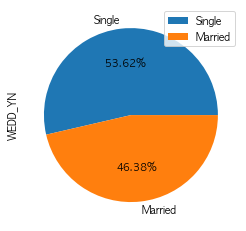

In [116]:
weed_yn.plot(kind='pie', autopct='%.2f%%')
plt.legend()

([<matplotlib.axis.YTick at 0x118f922b0>,
 <a list of 2 Text yticklabel objects>)

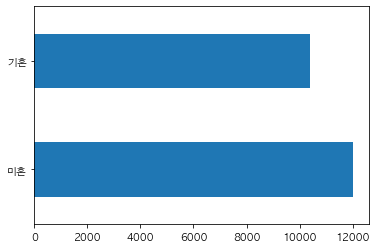

In [117]:
data_cust2['WEDD_YN'].value_counts().plot(kind='barh')
plt.yticks([1.0, 0.0], ['기혼', '미혼'])

In [118]:
# 중위값으로 처리 => data_cust1
data_cust1['CUST_INCM'].isnull().sum()

5263

In [119]:
data_cust1['CUST_INCM'].describe()

count    17137.000000
mean      2704.184863
std       2188.208641
min          0.000000
25%          0.000000
50%       3432.000000
75%       4398.000000
max      12687.000000
Name: CUST_INCM, dtype: float64

In [120]:
# 중위값 1
data_cust1['CUST_INCM'].median()

3432.0

In [121]:
data_cust1['CUST_INCM'].fillna(data_cust1['CUST_INCM'].median(), inplace=True)

In [122]:
# 중위값 2
data_cust1['CUST_INCM'].describe().loc['50%']

3432.0

In [123]:
data_cust1['CUST_INCM'].isnull().sum()

0

In [124]:
data_cust2['OCCP_CODE']

0        3
1        3
2        5
3        2
4        2
5        3
6        5
7        2
8        4
9        4
10       6
11       3
12       1
13       5
14       5
15       2
16       2
17       1
18       2
19       5
20       2
21       1
22       2
23       6
24       3
25       3
26       1
27       2
28       1
29       8
        ..
22370    8
22371    8
22372    8
22373    8
22374    3
22375    8
22376    6
22377    3
22378    8
22379    8
22380    8
22381    4
22382    8
22383    8
22384    1
22385    8
22386    2
22387    8
22388    3
22389    8
22390    8
22391    2
22392    3
22393    8
22394    5
22395    2
22396    1
22397    8
22398    8
22399    8
Name: OCCP_CODE, Length: 22400, dtype: int64

In [125]:
data_cust2[data_cust2['OCCP_CODE'] == 1]['OCCP_GRP_1']

12       1.주부
17       1.주부
21       1.주부
26       1.주부
28       1.주부
30       1.주부
33       1.주부
34       1.주부
35       1.주부
37       1.주부
38       1.주부
40       1.주부
43       1.주부
45       1.주부
46       1.주부
50       1.주부
54       1.주부
68       1.주부
70       1.주부
75       1.주부
77       1.주부
78       1.주부
80       1.주부
81       1.주부
87       1.주부
88       1.주부
90       1.주부
93       1.주부
94       1.주부
96       1.주부
         ... 
22023    1.주부
22028    1.주부
22043    1.주부
22046    1.주부
22050    1.주부
22058    1.주부
22074    1.주부
22102    1.주부
22110    1.주부
22137    1.주부
22175    1.주부
22181    1.주부
22183    1.주부
22193    1.주부
22217    1.주부
22225    1.주부
22231    1.주부
22232    1.주부
22245    1.주부
22252    1.주부
22258    1.주부
22267    1.주부
22273    1.주부
22285    1.주부
22307    1.주부
22309    1.주부
22356    1.주부
22361    1.주부
22384    1.주부
22396    1.주부
Name: OCCP_GRP_1, Length: 4820, dtype: object

In [126]:
data_cust2[data_cust2['OCCP_CODE'] == 1]['CUST_INCM'].head(20)

12    0.0
17    NaN
21    0.0
26    0.0
28    0.0
30    0.0
33    0.0
34    0.0
35    0.0
37    0.0
38    0.0
40    NaN
43    0.0
45    0.0
46    NaN
50    0.0
54    NaN
68    NaN
70    0.0
75    0.0
Name: CUST_INCM, dtype: float64

In [127]:
data_cust2.pivot_table(index='OCCP_CODE', values='CUST_INCM', aggfunc='mean')

CUST_INCM
OCCP_CODE             
0          4169.121951
1             0.000000
2          4621.081266
3          4319.376505
4          4173.168564
5          3949.647207
6          4181.931034
7          4025.830601
8           415.870774

In [128]:
data_cust2['CUST_INCM'].isnull().sum()

5263

In [129]:
tmp = data_cust2.pivot_table(index='OCCP_CODE', values='CUST_INCM', aggfunc='mean').to_dict()

In [130]:
occp_mean_incm = tmp['CUST_INCM']
occp_mean_incm

{0: 4169.121951219512,
 1: 0.0,
 2: 4621.081266490765,
 3: 4319.376505043931,
 4: 4173.168563685637,
 5: 3949.647207055859,
 6: 4181.931034482759,
 7: 4025.8306010928964,
 8: 415.87077385424493}

In [131]:
def incm_mean(row, mean_dict):
    if np.isnan(row['CUST_INCM']):
        return mean_dict[row['OCCP_CODE']]
    else:
        return row['CUST_INCM']

In [132]:
data_cust2['CUST_INCM_2'] = data_cust2.apply(incm_mean, mean_dict=occp_mean_incm, axis=1)

In [133]:
data_cust2[['OCCP_CODE','CUST_INCM', 'CUST_INCM_2']].head(20)

OCCP_CODE  CUST_INCM  CUST_INCM_2
0           3     4879.0  4879.000000
1           3     6509.0  6509.000000
2           5     4180.0  4180.000000
3           2        NaN  4621.081266
4           2     3894.0  3894.000000
5           3        NaN  4319.376505
6           5     3611.0  3611.000000
7           2     6465.0  6465.000000
8           4     4975.0  4975.000000
9           4     8780.0  8780.000000
10          6        NaN  4181.931034
11          3     4362.0  4362.000000
12          1        0.0     0.000000
13          5        NaN  3949.647207
14          5     5911.0  5911.000000
15          2        NaN  4621.081266
16          2     6024.0  6024.000000
17          1        NaN     0.000000
18          2     3825.0  3825.000000
19          5        NaN  3949.647207

In [134]:
data_cust2[['CUST_INCM','CUST_INCM_2']].isnull().sum()

CUST_INCM      5263
CUST_INCM_2       0
dtype: int64

In [135]:
# 학생분 코드!
# ~isnull()
tmp = data_cust2[data_cust2['CUST_INCM'].notnull()][['CUST_INCM', 'OCCP_CODE']]

In [136]:
oc_dict = {}
for o_c in tmp['OCCP_CODE'].unique():
    oc_dict[o_c] = tmp[tmp['OCCP_CODE'] == o_c]['CUST_INCM'].mean()

In [137]:
oc_dict

{3: 4319.376505043931,
 5: 3949.647207055859,
 2: 4621.081266490765,
 4: 4173.168563685637,
 1: 0.0,
 6: 4181.931034482759,
 8: 415.87077385424493,
 7: 4025.8306010928964,
 0: 4169.121951219512}

In [138]:
tmp2 = data_cust2[data_cust2['CUST_INCM'].isnull()]['OCCP_CODE'].map(oc_dict)

In [139]:
tmp2

3        4621.081266
5        4319.376505
10       4181.931034
13       3949.647207
15       4621.081266
17          0.000000
19       3949.647207
24       4319.376505
40          0.000000
42       3949.647207
46          0.000000
49        415.870774
54          0.000000
66       4621.081266
68          0.000000
76        415.870774
79        415.870774
80          0.000000
82       4169.121951
84        415.870774
85       4319.376505
86       4621.081266
87          0.000000
88          0.000000
89       3949.647207
90          0.000000
91        415.870774
92       4621.081266
93          0.000000
94          0.000000
            ...     
22301     415.870774
22306     415.870774
22307       0.000000
22309       0.000000
22310    4169.121951
22311     415.870774
22316    4025.830601
22321     415.870774
22323     415.870774
22324     415.870774
22326     415.870774
22330     415.870774
22333     415.870774
22355     415.870774
22356       0.000000
22361       0.000000
22362     415

In [140]:
data_cust2['CUST_INCM']

0        4879.0
1        6509.0
2        4180.0
3           NaN
4        3894.0
5           NaN
6        3611.0
7        6465.0
8        4975.0
9        8780.0
10          NaN
11       4362.0
12          0.0
13          NaN
14       5911.0
15          NaN
16       6024.0
17          NaN
18       3825.0
19          NaN
20       3794.0
21          0.0
22       3866.0
23       5632.0
24          NaN
25       3574.0
26          0.0
27       4688.0
28          0.0
29       2858.0
          ...  
22370       0.0
22371       0.0
22372       0.0
22373       0.0
22374       NaN
22375       NaN
22376    4096.0
22377    3726.0
22378       NaN
22379       0.0
22380       0.0
22381    3089.0
22382       NaN
22383       NaN
22384       NaN
22385       0.0
22386    5914.0
22387       0.0
22388    3913.0
22389       0.0
22390       0.0
22391    5185.0
22392    2299.0
22393       NaN
22394    5090.0
22395    3331.0
22396       0.0
22397       0.0
22398       NaN
22399       NaN
Name: CUST_INCM, Length:

In [141]:
data_cust2['CUST_INCM_3'] = data_cust2['CUST_INCM'].fillna(tmp2)

In [142]:
data_cust2[data_cust2['CUST_INCM'].isnull()][['CUST_INCM', 'CUST_INCM_2', 'CUST_INCM_3']].head(20)

CUST_INCM  CUST_INCM_2  CUST_INCM_3
3         NaN  4621.081266  4621.081266
5         NaN  4319.376505  4319.376505
10        NaN  4181.931034  4181.931034
13        NaN  3949.647207  3949.647207
15        NaN  4621.081266  4621.081266
17        NaN     0.000000     0.000000
19        NaN  3949.647207  3949.647207
24        NaN  4319.376505  4319.376505
40        NaN     0.000000     0.000000
42        NaN  3949.647207  3949.647207
46        NaN     0.000000     0.000000
49        NaN   415.870774   415.870774
54        NaN     0.000000     0.000000
66        NaN  4621.081266  4621.081266
68        NaN     0.000000     0.000000
76        NaN   415.870774   415.870774
79        NaN   415.870774   415.870774
80        NaN     0.000000     0.000000
82        NaN  4169.121951  4169.121951
84        NaN   415.870774   415.870774

In [143]:
# fillna()

In [144]:
data_cust2[(data_cust2['OCCP_CODE'] == 1) & (data_cust2['CUST_INCM'].isnull())]['CUST_INCM'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
data_cust2[(data_cust2['OCCP_CODE'] == 1) & (data_cust2['CUST_INCM'].isnull())]['CUST_INCM'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
tmp_idx = data_cust2[(data_cust2['OCCP_CODE'] == 1) & (data_cust2['CUST_INCM'].isnull())]['CUST_INCM'].index 

In [147]:
data_cust3 = data_cust2.copy()

In [148]:
# df에서 조건색인 결과에 대해 스칼라값 적용시 지켜야하는 규칙
# df.loc[idx, col] = scalar
data_cust3.loc[tmp_idx,'CUST_INCM'] = 0

In [149]:
data_cust3.loc[tmp_idx,'CUST_INCM']

17       0.0
40       0.0
46       0.0
54       0.0
68       0.0
80       0.0
87       0.0
88       0.0
90       0.0
93       0.0
94       0.0
96       0.0
100      0.0
102      0.0
156      0.0
167      0.0
173      0.0
178      0.0
179      0.0
190      0.0
191      0.0
193      0.0
194      0.0
195      0.0
198      0.0
201      0.0
203      0.0
205      0.0
207      0.0
209      0.0
        ... 
21374    0.0
21388    0.0
21400    0.0
21496    0.0
21520    0.0
21620    0.0
21653    0.0
21705    0.0
21710    0.0
21814    0.0
21815    0.0
21826    0.0
22007    0.0
22012    0.0
22043    0.0
22058    0.0
22175    0.0
22181    0.0
22183    0.0
22193    0.0
22232    0.0
22245    0.0
22252    0.0
22258    0.0
22285    0.0
22307    0.0
22309    0.0
22356    0.0
22361    0.0
22384    0.0
Name: CUST_INCM, Length: 1005, dtype: float64

In [150]:
data_cust3['OCCP_CODE'].unique()

array([3, 5, 2, 4, 6, 1, 8, 7, 0])

In [151]:
# 반복문 처리
for i in data_cust3['OCCP_CODE'].unique():
    idx = data_cust3[(data_cust3['OCCP_CODE'] == i) & (data_cust3['CUST_INCM'].isnull())]['CUST_INCM'].index 
    data_cust3.loc[idx,'CUST_INCM'] = 0

In [152]:
df = pd.DataFrame({'a':[1,2,3,4], 'b':[0,1,0,1]})
df

a  b
0  1  0
1  2  1
2  3  0
3  4  1

#### ------------------------------------------------------------------------------------------
#### 데이터프레임의 일부 값(튜플, 데이터)에 새로운 값 할당 시 주의점

In [153]:
# boolean indexing (조건색인) 결과 값은 다른 값으로 할당 X
df[df['b'] == 0]['b'] = 100

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
df[df['b'] == 0]['b'].index

Int64Index([0, 2], dtype='int64')

In [155]:
# index에 대해 인덱싱 한 결과에 대해서는 새로운 값 할당 O
df.loc[[0,2], 'b'] = 100
df

a    b
0  1  100
1  2    1
2  3  100
3  4    1

### ------------------------------------------------------------------------------------------

In [156]:
data_cust2[['MINCRDT', 'MAXCRDT']].describe()

MINCRDT       MAXCRDT
count  22400.000000  22400.000000
mean       5.907054     13.777857
std        2.671222     25.468311
min        0.000000      0.000000
25%        6.000000      6.000000
50%        6.000000      6.000000
75%        6.000000      6.000000
max       99.000000     99.000000

In [157]:
data_cust2[data_cust2['MINCRDT'] == 99].shape

(14, 30)

In [158]:
data_cust2[data_cust2['MINCRDT'] > 90].shape

(14, 30)

In [159]:
data_cust2[data_cust2['MINCRDT'] > 90]

CUST_ID  DIVIDED_SET  SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
4746      6611            1          0.0    2   40      13611            20.0   
6689      9337            1          0.0    2   61       6666            20.0   
7111      9819            1          0.0    1   48       7500            30.0   
7527     10452            1          0.0    2   39      13205            13.0   
7731     10849            1          0.0    2   29       3801            30.0   
9412     13271            1          0.0    1   34      15454            20.0   
15028    20998            1          0.0    1   49      22500            20.0   
16845    11450            1          0.0    1   68       4576            99.0   
18880     5017            1          0.0    2   59      16111            20.0   
19102     2054            1          0.0    2   32      39957            20.0   
19842     5020            1          0.0    1   59      19361            12.0   
19986    17049            1          0.0    1   22      20555            20.0   
21500    20011            1          0.0    1   23       3569            12.0   
21665    11012            1          0.0    2   25      28472            20.0   

       FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2   TOTALPREM  MINCRDT  \
4746           0   200910.0   울산       1.주부         주부   8912317.0     99.0   
6689           0   200306.0   경북       1.주부         주부  21725099.0     99.0   
7111           0   200306.0   전북      3.사무직        사무직  32830204.0     99.0   
7527           0   200106.0   경남       1.주부         주부   4053732.0     99.0   
7731           0   200703.0   부산      2.자영업        자영업   4318050.0     99.0   
9412           0   201009.0   경기      6.제조업   2차산업 종사자   7913294.0     99.0   
15028          0   200306.0   울산          0        NaN   4094600.0     99.0   
16845          0   200306.0   전남      5.서비스   3차산업 종사자  16224632.0     99.0   
18880          0   200306.0   대구       1.주부         주부  70847193.0     99.0   
19102          0   200909.0   대구       8.기타         학생   6936158.0     99.0   
19842          0   200306.0   경기      5.서비스   3차산업 종사자   6185400.0     99.0   
19986          0   200306.0   충북       8.기타         학생  16224632.0     99.0   
21500          0   201004.0   경기       8.기타         학생  16224632.0     99.0   
21665          0   201005.0   광주       8.기타         학생  16224632.0     99.0   

       MAXCRDT  WEDD_YN MATE_OCCP_GRP_1 MATE_OCCP_GRP_2  CHLD_CNT  \
4746      99.0      1.0           6.제조업        2차산업 종사자       2.0   
6689      99.0      1.0           2.자영업             자영업       0.0   
7111      99.0      1.0            1.주부              주부       2.0   
7527      99.0      1.0           2.자영업             자영업       2.0   
7731      99.0      0.0             NaN             NaN       0.0   
9412      99.0      1.0            1.주부              주부       0.0   
15028     99.0      1.0            1.주부              주부       2.0   
16845     99.0      1.0           5.서비스        3차산업 종사자       0.0   
18880     99.0      1.0           2.자영업             자영업       2.0   
19102     99.0      0.0             NaN             NaN       0.0   
19842     99.0      1.0            1.주부              주부       1.0   
19986     99.0      0.0             NaN             NaN       0.0   
21500     99.0      0.0             NaN             NaN       0.0   
21665     99.0      0.0             NaN             NaN       0.0   

       LTBN_CHLD_AGE  MAX_PAYM_YM   MAX_PRM  CUST_INCM  RCBASE_HSHD_INCM  \
4746            11.0     201606.0  115509.0        0.0              4699   
6689             0.0     200305.0  250400.0        NaN              4876   
7111            15.0     200912.0  261776.0     4595.0              4921   
7527            12.0     201209.0  132645.0        0.0              4293   
7731             0.0     201605.0   50229.0     2637.0              3832   
9412             0.0     201009.0  116018.0     3363.0              4585   
15028           13.0     199904.0  21

In [160]:
data_cust2[data_cust2['MINCRDT'] > 10].shape

(15, 30)

In [161]:
data_cust2[data_cust2['MINCRDT'] > 10]['MINCRDT']

896      28.0
4746     99.0
6689     99.0
7111     99.0
7527     99.0
7731     99.0
9412     99.0
15028    99.0
16845    99.0
18880    99.0
19102    99.0
19842    99.0
19986    99.0
21500    99.0
21665    99.0
Name: MINCRDT, dtype: float64

In [162]:
data_cust2[data_cust2['MAXCRDT'] > 10].shape

(1836, 30)

In [163]:
data_cust2[(data_cust2['MAXCRDT'] > 10) & (data_cust2['MAXCRDT'] != 99)]['MAXCRDT']

896    28.0
Name: MAXCRDT, dtype: float64

In [164]:
# 최소 신용 등급, 최고 신용등급 => 관계, 왜 최소를 선택했는지
# 직업군, 소득 => 관계
# 배우자 직업 => 유지
# 자녀수, 막내자녀연령 => 삭제

In [165]:
# 데이터 탐색
# 범주형 데이터(시각화 : 막대, 파이, 히스토그램)
# 사기자여부에 따라 데이터 분리
# 사기자인 사람들의 데이터
# 일반인인 사람들의 데이터

In [166]:
data_cust2['CHLD_CNT']

0        2.0
1        2.0
2        0.0
3        0.0
4        3.0
5        1.0
6        1.0
7        1.0
8        1.0
9        2.0
10       0.0
11       0.0
12       0.0
13       0.0
14       4.0
15       1.0
16       2.0
17       2.0
18       2.0
19       0.0
20       1.0
21       2.0
22       2.0
23       2.0
24       1.0
25       3.0
26       0.0
27       2.0
28       4.0
29       1.0
        ... 
22370    0.0
22371    0.0
22372    0.0
22373    0.0
22374    1.0
22375    0.0
22376    0.0
22377    0.0
22378    0.0
22379    0.0
22380    0.0
22381    0.0
22382    0.0
22383    0.0
22384    0.0
22385    0.0
22386    2.0
22387    0.0
22388    0.0
22389    0.0
22390    0.0
22391    3.0
22392    0.0
22393    0.0
22394    2.0
22395    0.0
22396    0.0
22397    0.0
22398    0.0
22399    0.0
Name: CHLD_CNT, Length: 22400, dtype: float64

In [167]:
# 사기자 데이터
# 자녀수, 막내자녀연령 
사기자 = data_cust2[data_cust2['SIU_CUST_YN']==1]['CHLD_CNT']

In [168]:
# 연령대처럼 자녀수도 범주형으로 변경 후 탐색하는것이 좋다(추가 작업 필요)
사기자.describe()

count    1806.000000
mean        0.809524
std         1.015797
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: CHLD_CNT, dtype: float64

In [169]:
일반인 = data_cust2[data_cust2['SIU_CUST_YN']==0]['CHLD_CNT']

In [170]:
일반인.describe()

count    18801.000000
mean         0.683634
std          0.941091
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: CHLD_CNT, dtype: float64

In [171]:
# 직업군, 소득 => 관계
data_cust2[['OCCP_CODE', 'CUST_INCM']]

OCCP_CODE  CUST_INCM
0              3     4879.0
1              3     6509.0
2              5     4180.0
3              2        NaN
4              2     3894.0
5              3        NaN
6              5     3611.0
7              2     6465.0
8              4     4975.0
9              4     8780.0
10             6        NaN
11             3     4362.0
12             1        0.0
13             5        NaN
14             5     5911.0
15             2        NaN
16             2     6024.0
17             1        NaN
18             2     3825.0
19             5        NaN
20             2     3794.0
21             1        0.0
22             2     3866.0
23             6     5632.0
24             3        NaN
25             3     3574.0
26             1        0.0
27             2     4688.0
28             1        0.0
29             8     2858.0
...          ...        ...
22370          8        0.0
22371          8        0.0
22372          8        0.0
22373          8        0.0
22374          3        NaN
22375          8        NaN
22376          6     4096.0
22377          3     3726.0
22378          8        NaN
22379          8        0.0
22380          8        0.0
22381          4     3089.0
22382          8        NaN
22383          8        NaN
22384          1        NaN
22385          8        0.0
22386          2     5914.0
22387          8        0.0
22388          3     3913.0
22389          8        0.0
22390          8        0.0
22391          2     5185.0
22392          3     2299.0
22393          8        NaN
22394          5     5090.0
22395          2     3331.0
22396          1        0.0
22397          8        0.0
22398          8        NaN
22399          8        NaN

[22400 rows x 2 columns]

In [172]:
occp_icm_med = data_cust2.pivot_table(index='OCCP_CODE', values='CUST_INCM', aggfunc='median')

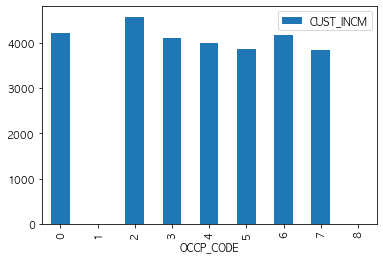

In [173]:
occp_icm_med.plot(kind='bar')

In [174]:
data_cust2.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'AGE_GEN', 'CTPR_2', 'OCCP_CODE', 'CUST_INCM_2',
       'CUST_INCM_3'],
      dtype='object')

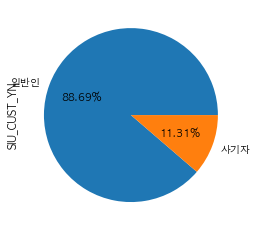

In [175]:
# 1번 직업군
# 사기자 비율
# 2번 직업군
# 사기자 비율
tmp1 = data_cust2[data_cust2['OCCP_CODE'] == 1]['SIU_CUST_YN'].value_counts()
tmp1.index = ['일반인', '사기자']
tmp1.plot(kind='pie', autopct='%.2f%%')

In [176]:
tmp2 = data_cust2[data_cust2['OCCP_CODE'] == 2]['SIU_CUST_YN'].value_counts()
tmp2.index = ['일반인', '사기자']
tmp2

일반인    1808
사기자     301
Name: SIU_CUST_YN, dtype: int64

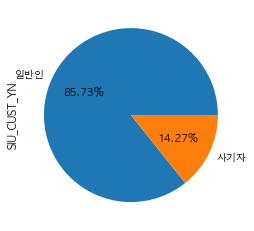

In [177]:
tmp2.plot(kind='pie', autopct='%.2f%%')

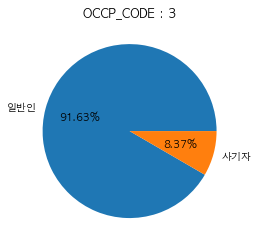

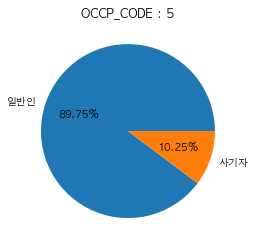

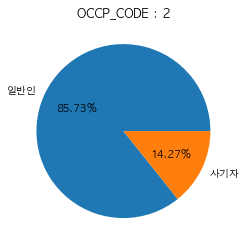

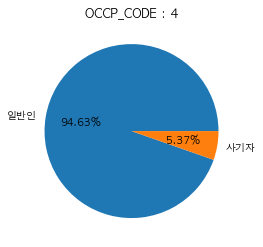

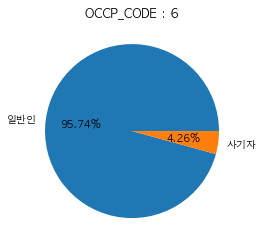

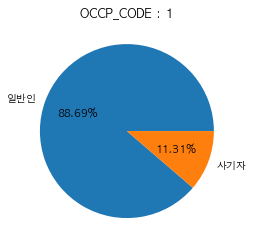

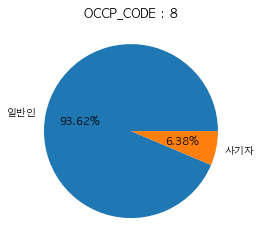

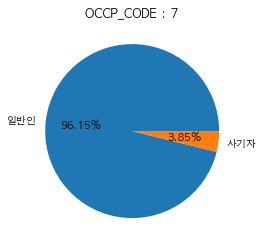

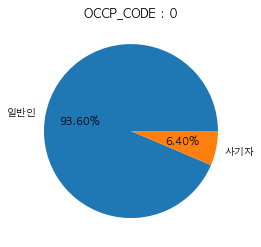

In [178]:
for i in data_cust2['OCCP_CODE'].unique():
    plt.figure()
    tmp = data_cust2[data_cust2['OCCP_CODE'] == i]['SIU_CUST_YN'].value_counts()
    tmp.index = ['일반인', '사기자']
    tmp.plot(kind='pie', autopct='%.2f%%')
    plt.ylabel('')
    plt.title('OCCP_CODE : {}'.format(i))

In [179]:
# 연속형 데이터(상관분석, 시각화 : 산점도, 라인)

In [180]:
data_claim = pd.read_csv('CLAIM_DATA.csv', encoding='utf-16', engine='python', sep=',')
data_claim.head()

CUST_ID  POLY_NO ACCI_OCCP_GRP1 ACCI_OCCP_GRP2 CHANG_FP_YN  CNTT_RECP_SQNO  \
0     5936     1365           8.기타             학생           Y   2006011200001   
1     5936     6151           8.기타             학생           Y   2006011200002   
2     5936    10364           8.기타             학생           Y   2006011200003   
3     1043     1247           1.주부             주부           N   2006011200004   
4     8545    11236           1.주부             주부           Y   2006011200005   

   RECP_DATE  ORIG_RESN_DATE  RESN_DATE  CRNT_PROG_DVSN  ACCI_DVSN CAUS_CODE  \
0   20060112        20060109   20060109              11          1       W21   
1   20060112        20060109   20060109              11          1       W21   
2   20060112        20060109   20060109              11          1       W21   
3   20060112        20060105   20060105              23          3       A09   
4   20060112        20060110   20060110              11          3       I83   

  CAUS_CODE_DTAL                DSAS_NAME  DMND_RESN_CODE  ...  \
0              #                 하악부표재성손상               3  ...   
1              #                 하악부표재성손상               3  ...   
2              #                 하악부표재성손상               3  ...   
3              #  기타세균성창자감염|손목및손의2도화상|피부염               2  ...   
4              #      좌측하지정맥류혈관발거술|레이저소작술               5  ...   

   HOSP_SPEC_DVSN  CHME_LICE_NO   PAYM_DATE DMND_AMT PAYM_AMT  PMMI_DLNG_YN  \
0            95.0         11606  20060112.0    20000    20000             N   
1            95.0         11606  20060112.0    30000    30000             N   
2            95.0         11606  20060112.0    40000    40000             N   
3            95.0         17647  20060113.0    60000    60000             N   
4            30.0         25697  20060112.0   200000   200000             N   

   SELF_CHAM  NON_PAY TAMT_SFCA  PATT_CHRG_TOTA  DSCT_AMT  COUNT_TRMT_ITEM  \
0        NaN      NaN       NaN             NaN       NaN              NaN   
1        NaN      NaN       NaN             NaN       NaN              NaN   
2        NaN      NaN       NaN             NaN       NaN              NaN   
3        NaN      NaN       NaN             NaN       NaN              NaN   
4        NaN      NaN       NaN             NaN       NaN              NaN   

   DCAF_CMPS_XCPA  NON_PAY_RATIO HEED_HOSP_YN  
0             NaN            0.0            N  
1             NaN            0.0            N  
2             NaN            0.0            N  
3             NaN            0.0            N  
4             NaN            0.0            N  

[5 rows x 39 columns]

In [181]:
data_claim.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN'],
      dtype='object')

In [182]:
data_claim[['HOSP_OTPA_STDT','HOSP_OTPA_ENDT']].head()

HOSP_OTPA_STDT  HOSP_OTPA_ENDT
0      20060109.0      20060111.0
1      20060109.0      20060111.0
2      20060109.0      20060111.0
3      20060105.0      20060110.0
4             NaN             NaN

In [183]:
# 사용해야하는 컬럼이 주어지지 않을 때 사용할 수 있는 방법
data_claim['HOSP_DAYS'] = data_claim['HOSP_OTPA_ENDT'] - data_claim['HOSP_OTPA_STDT']

In [184]:
tmp = data_claim.pivot_table(index='CUST_ID', values='HOSP_DAYS', aggfunc='mean')

In [185]:
tmp[tmp['HOSP_DAYS'] == 0]

HOSP_DAYS
CUST_ID           
60             0.0
157            0.0
177            0.0
192            0.0
336            0.0
397            0.0
526            0.0
605            0.0
617            0.0
629            0.0
633            0.0
688            0.0
694            0.0
720            0.0
746            0.0
842            0.0
894            0.0
917            0.0
937            0.0
955            0.0
962            0.0
972            0.0
1063           0.0
1065           0.0
1075           0.0
1128           0.0
1134           0.0
1207           0.0
1242           0.0
1250           0.0
...            ...
21957          0.0
21977          0.0
22013          0.0
22049          0.0
22070          0.0
22073          0.0
22098          0.0
22121          0.0
22122          0.0
22167          0.0
22231          0.0
22252          0.0
22261          0.0
22272          0.0
22273          0.0
22287          0.0
22295          0.0
22308          0.0
22310          0.0
22320          0.0
22329          0.0
22345          0.0
22365          0.0
22374          0.0
22383          0.0
22391          0.0
22393          0.0
22398          0.0
22399          0.0
22400          0.0

[787 rows x 1 columns]

In [186]:
data_cust2.head()

CUST_ID  DIVIDED_SET  SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
0        1            1          0.0    2   47      21111            20.0   
1        2            1          0.0    1   53      40000            20.0   
2        3            1          0.0    1   60          0            20.0   
3        4            1          0.0    2   64      12861            40.0   
4        5            1          0.0    2   54          0            20.0   

   FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2    TOTALPREM  MINCRDT  \
0          0   199910.0   충북      3.사무직        사무직  146980441.0      6.0   
1          0   199910.0   서울      3.사무직        사무직   94600109.0      1.0   
2          0   199910.0   서울      5.서비스   2차산업 종사자   18501269.0      6.0   
3          1   199910.0   경기      2.자영업   3차산업 종사자  317223657.0      2.0   
4          1   199910.0   광주      2.자영업   3차산업 종사자   10506072.0      8.0   

   MAXCRDT  WEDD_YN MATE_OCCP_GRP_1 MATE_OCCP_GRP_2  CHLD_CNT  LTBN_CHLD_AGE  \
0      6.0      1.0           3.사무직        2차산업 종사자       2.0           13.0   
1      6.0      1.0            1.주부              주부       2.0           17.0   
2      6.0      0.0             NaN             NaN       0.0            0.0   
3     99.0      0.0             NaN             NaN       0.0            0.0   
4      8.0      1.0           3.사무직          고위 공무원       3.0           19.0   

   MAX_PAYM_YM    MAX_PRM  CUST_INCM  RCBASE_HSHD_INCM  JPBASE_HSHD_INCM  \
0     200811.0   319718.0     4879.0             10094           11337.0   
1     200012.0   341341.0     6509.0              9143            6509.0   
2     200305.0   131300.0     4180.0                 0            4180.0   
3     201009.0  1493184.0        NaN              4270            5914.0   
4     200807.0   166760.0     3894.0                 0            8885.0   

  AGE_GEN  CTPR_2  OCCP_CODE  CUST_INCM_2  CUST_INCM_3  
0      40     1.0          3  4879.000000  4879.000000  
1      50     2.0          3  6509.000000  6509.000000  
2      50     2.0          5  4180.000000  4180.000000  
3      60     3.0          2  4621.081266  4621.081266  
4      50     4.0          2  3894.000000  3894.000000

In [187]:
# VLID_HOSP_OTDA(통원일/입원일) 컬럼을 이용하여 고객별 평균 입원일 컬럼 추가
hosp_mdays = data_claim.pivot_table(index='CUST_ID', values='VLID_HOSP_OTDA', aggfunc='mean')

In [188]:
data_cust2.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PAYM_YM', 'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM',
       'JPBASE_HSHD_INCM', 'AGE_GEN', 'CTPR_2', 'OCCP_CODE', 'CUST_INCM_2',
       'CUST_INCM_3'],
      dtype='object')

In [189]:
data_claim.columns

Index(['CUST_ID', 'POLY_NO', 'ACCI_OCCP_GRP1', 'ACCI_OCCP_GRP2', 'CHANG_FP_YN',
       'CNTT_RECP_SQNO', 'RECP_DATE', 'ORIG_RESN_DATE', 'RESN_DATE',
       'CRNT_PROG_DVSN', 'ACCI_DVSN', 'CAUS_CODE', 'CAUS_CODE_DTAL',
       'DSAS_NAME', 'DMND_RESN_CODE', 'DMND_RSCD_SQNO', 'HOSP_OTPA_STDT',
       'HOSP_OTPA_ENDT', 'RESL_CD1', 'RESL_NM1', 'VLID_HOSP_OTDA',
       'HOUSE_HOSP_DIST', 'HOSP_CODE', 'ACCI_HOSP_ADDR', 'HOSP_SPEC_DVSN',
       'CHME_LICE_NO', 'PAYM_DATE', 'DMND_AMT', 'PAYM_AMT', 'PMMI_DLNG_YN',
       'SELF_CHAM', 'NON_PAY', 'TAMT_SFCA', 'PATT_CHRG_TOTA', 'DSCT_AMT',
       'COUNT_TRMT_ITEM', 'DCAF_CMPS_XCPA', 'NON_PAY_RATIO', 'HEED_HOSP_YN',
       'HOSP_DAYS'],
      dtype='object')

In [190]:
# set() 타입 : 교집합
cust_set = set(data_cust2.columns)
claim_set = set(data_claim.columns)

In [191]:
# &, intersection
cust_set & claim_set

{'CUST_ID'}

In [192]:
# index로 있던 CUST_ID를 컬럼으로 올려주기
# 나중에 merge 하기 위함
hosp_mdays = hosp_mdays.reset_index()

In [193]:
hosp_mdays

CUST_ID  VLID_HOSP_OTDA
0            1        1.250000
1            2        2.666667
2            3       16.000000
3            4        0.000000
4            5       25.000000
5            6        2.000000
6            7       32.444444
7            8        2.100000
8            9        1.500000
9           10       60.000000
10          11        7.000000
11          12        5.000000
12          13       14.666667
13          14       20.214286
14          15        6.500000
15          16        8.500000
16          17       13.500000
17          18        1.666667
18          19       32.800000
19          20        2.800000
20          21        6.333333
21          22        5.181818
22          23        8.000000
23          24        6.000000
24          25        5.916667
25          26       14.125000
26          27        0.000000
27          28        8.500000
28          29        3.000000
29          30       22.000000
...        ...             ...
22370    22371        7.666667
22371    22372        2.500000
22372    22373        0.000000
22373    22374        1.000000
22374    22375        3.333333
22375    22376        2.000000
22376    22377        1.500000
22377    22378        4.142857
22378    22379        2.166667
22379    22380       14.666667
22380    22381        2.777778
22381    22382        3.000000
22382    22383        0.600000
22383    22384        6.000000
22384    22385        4.000000
22385    22386        6.000000
22386    22387        2.000000
22387    22388        2.500000
22388    22389        5.750000
22389    22390        2.000000
22390    22391        1.000000
22391    22392        1.500000
22392    22393        1.000000
22393    22394        4.333333
22394    22395       25.000000
22395    22396        3.000000
22396    22397        4.000000
22397    22398        1.000000
22398    22399        1.000000
22399    22400        1.000000

[22400 rows x 2 columns]

In [194]:
data_cust2.shape

(22400, 30)

In [195]:
# merge : 공통 컬럼 기준으로 두 개의 데이터를 결합
# CUST_ID

data_cust3 = pd.merge(data_cust2, hosp_mdays)

In [196]:
data_cust3.shape

(22400, 31)

In [197]:
'VLID_HOSP_OTDA' in data_cust3.columns

True

In [198]:
data_claim[['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']].head(10)

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
0     5936          1               3
1     5936          1               3
2     5936          1               3
3     1043          3               2
4     8545          3               5
5     4734          3               2
6     9416          1               5
7    20267          3               2
8     2778          1               2
9     9019          3               2

In [199]:
data_claim.groupby(['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE'])['HOSP_OTPA_ENDT'].count()

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
1        3          3                  4
2        3          3                  3
3        2          2                  1
4        1          6                  0
5        2          2                  1
6        1          5                  0
                    6                  0
         3          2                  1
7        1          2                  4
         2          2                  1
         3          2                  4
8        3          2                  4
                    3                  1
                    5                  0
9        1          3                  2
         3          3                  2
10       1          1                  0
                    2                  2
11       2          2                  1
12       1          3                  1
13       2          2                  1
         3          2                  2
14       3          2                  4
                    3 

In [200]:
# 고객이 보험을 청구한 경우에 대해서만 개수를 구함
data_claim.groupby(['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']).size()

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
1        3          3                  4
2        3          3                  3
3        2          2                  1
4        1          6                  9
5        2          2                  1
6        1          5                  1
                    6                  1
         3          2                  1
7        1          2                  4
         2          2                  1
         3          2                  4
8        3          2                  4
                    3                  1
                    5                  5
9        1          3                  2
         3          3                  2
10       1          1                  1
                    2                  2
11       2          2                  1
12       1          3                  1
13       2          2                  1
         3          2                  2
14       3          2                  4
                    3 

In [201]:
set(data_claim.groupby(['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']).size().values)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 56,
 59,
 60,
 62,
 64,
 65,
 66,
 68,
 69,
 71,
 72,
 73,
 74,
 76,
 90}

In [202]:
data_claim.groupby(['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']).size()

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
1        3          3                  4
2        3          3                  3
3        2          2                  1
4        1          6                  9
5        2          2                  1
6        1          5                  1
                    6                  1
         3          2                  1
7        1          2                  4
         2          2                  1
         3          2                  4
8        3          2                  4
                    3                  1
                    5                  5
9        1          3                  2
         3          3                  2
10       1          1                  1
                    2                  2
11       2          2                  1
12       1          3                  1
13       2          2                  1
         3          2                  2
14       3          2                  4
                    3 

In [203]:
# 모든 경우의 수에 대해 size/청구횟수를 구하자
# 청구한 적 없는 경우 : 0
# 청구한 경우 : 횟수(groupby size)
# 구조 변경만 해주면 된다!
# 단일 인덱스 -> 계층 인덱스

In [204]:
level1 = [0,1,2]
level2 = ['A','B']

In [205]:
idx = pd.MultiIndex.from_product([level1, level2], names=['ID', 'case'])
idx

MultiIndex(levels=[[0, 1, 2], ['A', 'B']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['ID', 'case'])

In [206]:
import numpy as np

data = np.random.randn(12).reshape(6,-1)

In [207]:
pd.DataFrame(data, index=idx)

0         1
ID case                    
0  A     1.181533  2.157014
   B    -0.315694 -0.075077
1  A     2.344266 -0.971325
   B     0.306951 -0.635402
2  A     1.653102 -1.945117
   B     0.527173  1.007486

In [208]:
cross_table = data_claim.groupby(['CUST_ID', 'ACCI_DVSN', 'DMND_RESN_CODE']).size()

In [209]:
cross_table.head(20)

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
1        3          3                 4
2        3          3                 3
3        2          2                 1
4        1          6                 9
5        2          2                 1
6        1          5                 1
                    6                 1
         3          2                 1
7        1          2                 4
         2          2                 1
         3          2                 4
8        3          2                 4
                    3                 1
                    5                 5
9        1          3                 2
         3          3                 2
10       1          1                 1
                    2                 2
11       2          2                 1
12       1          3                 1
dtype: int64

In [210]:
# 힌트처럼 인덱스를 각각의 리스트로 생성해서 전달하지 않고 기존 데이터에서 추출해서 사용하는 방법
df = data_claim[['CUST_ID','ACCI_DVSN','DMND_RESN_CODE']].copy()

In [211]:
df.head(2)

CUST_ID  ACCI_DVSN  DMND_RESN_CODE
0     5936          1               3
1     5936          1               3

In [212]:
df.values.T

array([[ 5936,  5936,  5936, ...,  6864, 15545, 21542],
       [    1,     1,     1, ...,     3,     3,     3],
       [    3,     3,     3, ...,     2,     3,     2]])

In [213]:
len(list(map(set, df.values.T)))

3

In [214]:
list(map(set, df.values.T))[0]

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [215]:
list(map(set, df.values.T))[1]

{1, 2, 3}

In [216]:
list(map(set, df.values.T))[2]

{1, 2, 3, 4, 5, 6, 7, 9}

In [217]:
idx2 = pd.MultiIndex.from_product(list(map(set, df.values.T)))
idx2

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

#### 힌트

In [218]:
ids = data_claim['CUST_ID'].sort_values().unique()

In [219]:
acci = data_claim['ACCI_DVSN'].sort_values().unique()

In [220]:
dmnd = data_claim['DMND_RESN_CODE'].sort_values().unique()

In [221]:
idx = pd.MultiIndex.from_product([ids, acci, dmnd])

In [222]:
cross_table2 = cross_table.reindex(idx, fill_value=0)
cross_table2

1      1  1    0
          2    0
          3    0
          4    0
          5    0
          6    0
          7    0
          9    0
       2  1    0
          2    0
          3    0
          4    0
          5    0
          6    0
          7    0
          9    0
       3  1    0
          2    0
          3    4
          4    0
          5    0
          6    0
          7    0
          9    0
2      1  1    0
          2    0
          3    0
          4    0
          5    0
          6    0
              ..
22399  3  3    1
          4    0
          5    0
          6    0
          7    0
          9    0
22400  1  1    0
          2    0
          3    0
          4    0
          5    0
          6    0
          7    0
          9    0
       2  1    0
          2    0
          3    0
          4    0
          5    0
          6    0
          7    0
          9    0
       3  1    0
          2    0
          3    1
          4    0
          5    0
          6   

In [223]:
# CUST_ID : 인덱스
# 나머지 두 개 : 컬럼
cross_table3 = cross_table2.unstack([1,2])

In [224]:
cross_table3.columns

MultiIndex(levels=[[1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 9]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

In [225]:
for x,y in cross_table3.columns:
    print(x)
    print(y)

1
1
1
2
1
3
1
4
1
5
1
6
1
7
1
9
2
1
2
2
2
3
2
4
2
5
2
6
2
7
2
9
3
1
3
2
3
3
3
4
3
5
3
6
3
7
3
9


In [226]:
for x, y in cross_table3.columns:
    print('{}_{}'.format(x,y))

1_1
1_2
1_3
1_4
1_5
1_6
1_7
1_9
2_1
2_2
2_3
2_4
2_5
2_6
2_7
2_9
3_1
3_2
3_3
3_4
3_5
3_6
3_7
3_9


In [227]:
cols = []
for x, y in cross_table3.columns:
    cols.append('{}_{}'.format(x,y))

In [228]:
cols = ['{}_{}'.format(x,y) for x,y in cross_table3.columns]

In [229]:
cross_table3.columns = cols

In [230]:
cross_table3.head(10)

1_1  1_2  1_3  1_4  1_5  1_6  1_7  1_9  2_1  2_2  2_3  2_4  2_5  2_6  2_7  \
1     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3     0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
4     0    0    0    0    0    9    0    0    0    0    0    0    0    0    0   
5     0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
6     0    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
7     0    4    0    0    0    0    0    0    0    1    0    0    0    0    0   
8     0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
9     0    0    2    0    0    0    0    0    0    0    0    0    0    0    0   
10    1    2    0    0    0    0    0    0    0    0    0    0    0    0    0   

    2_9  3_1  3_2  3_3  3_4  3_5  3_6  3_7  3_9  
1     0    0    0    4    0    0    0    0    0  
2     0    0    0    3    0    0    0    0    0  
3     0    0    0    0    0    0    0    0    0  
4     0    0    0    0    0    0    0    0    0  
5     0    0    0    0    0    0    0    0    0  
6     0    0    1    0    0    0    0    0    0  
7     0    0    4    0    0    0    0    0    0  
8     0    0    4    1    0    5    0    0    0  
9     0    0    0    2    0    0    0    0    0  
10    0    0    0    0    0    0    0    0    0

In [231]:
cross_table3.index.name = 'CUST_ID'
cross_table3.head()

1_1  1_2  1_3  1_4  1_5  1_6  1_7  1_9  2_1  2_2  2_3  2_4  2_5  2_6  \
CUST_ID                                                                         
1          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3          0    0    0    0    0    0    0    0    0    1    0    0    0    0   
4          0    0    0    0    0    9    0    0    0    0    0    0    0    0   
5          0    0    0    0    0    0    0    0    0    1    0    0    0    0   

         2_7  2_9  3_1  3_2  3_3  3_4  3_5  3_6  3_7  3_9  
CUST_ID                                                    
1          0    0    0    0    4    0    0    0    0    0  
2          0    0    0    0    3    0    0    0    0    0  
3          0    0    0    0    0    0    0    0    0    0  
4          0    0    0    0    0    0    0    0    0    0  
5          0    0    0    0    0    0    0    0    0    0

In [232]:
cross_table3 = cross_table3.reset_index()

In [233]:
data_cust3.shape

(22400, 31)

In [234]:
data_cust4 = pd.merge(data_cust3, cross_table3)

In [235]:
data_cust4.head(2)

CUST_ID  DIVIDED_SET  SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
0        1            1          0.0    2   47      21111            20.0   
1        2            1          0.0    1   53      40000            20.0   

   FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2    TOTALPREM  MINCRDT  \
0          0   199910.0   충북      3.사무직        사무직  146980441.0      6.0   
1          0   199910.0   서울      3.사무직        사무직   94600109.0      1.0   

   MAXCRDT  ...  2_2 2_3 2_4  2_5  2_6  2_7  2_9  3_1  3_2  3_3 3_4  3_5  3_6  \
0      6.0  ...    0   0   0    0    0    0    0    0    0    4   0    0    0   
1      6.0  ...    0   0   0    0    0    0    0    0    0    3   0    0    0   

   3_7  3_9  
0    0    0  
1    0    0  

[2 rows x 55 columns]

In [236]:
# 데이터의 분산 = 0 : 모든 데이터가 동일 => 종속변수에 따라 값의 변동 X
# 종속변수와 관계 없는 데이터로 확인할 수 있음
# 숫자형 데이터만 선별하여 각 컬럼의 분산 => 0인 컬럼이 있는지 확인
data_cust3._get_numeric_data().describe()

CUST_ID   DIVIDED_SET   SIU_CUST_YN           SEX           AGE  \
count  22400.000000  22400.000000  20607.000000  22400.000000  22400.000000   
mean   11200.500000      1.080045      0.087640      1.565134     44.734866   
std     6466.467351      0.271368      0.282778      0.495750     15.445707   
min        1.000000      1.000000      0.000000      1.000000      2.000000   
25%     5600.750000      1.000000      0.000000      1.000000     34.000000   
50%    11200.500000      1.000000      0.000000      2.000000     46.000000   
75%    16800.250000      1.000000      0.000000      2.000000     56.000000   
max    22400.000000      2.000000      1.000000      2.000000     89.000000   

           RESI_COST  RESI_TYPE_CODE     FP_CAREER      CUST_RGST  \
count   22400.000000    22400.000000  22400.000000   21944.000000   
mean    15914.413973       25.442500      0.054375  198924.250638   
std     14963.317519       20.147955      0.226761   16989.329112   
min         0.000000       11.000000      0.000000     101.000000   
25%      6732.750000       20.000000      0.000000  200306.000000   
50%     12222.000000       20.000000      0.000000  200306.000000   
75%     20988.000000       20.000000      0.000000  200402.000000   
max    305555.000000       99.000000      1.000000  201602.000000   

          TOTALPREM       MINCRDT       MAXCRDT       WEDD_YN      CHLD_CNT  \
count  2.240000e+04  22400.000000  22400.000000  22400.000000  22400.000000   
mean   2.642584e+07      5.907054     13.777857      0.536161      0.694509   
std    4.259899e+07      2.671222     25.468311      0.498702      0.949046   
min    5.000000e+02      0.000000      0.000000      0.000000      0.000000   
25%    9.483008e+06      6.000000      6.000000      0.000000      0.000000   
50%    1.622463e+07      6.000000      6.000000      1.000000      0.000000   
75%    2.589979e+07      6.000000      6.000000      1.000000      1.000000   
max    1.840052e+09     99.000000     99.000000      1.000000      6.000000   

       LTBN_CHLD_AGE    MAX_PAYM_YM       MAX_PRM     CUST_INCM  \
count   22400.000000   15914.000000  1.591400e+04  17137.000000   
mean        8.422054  200881.825437  4.807763e+05   2704.184863   
std        11.529165     522.266749  1.327265e+06   2188.208641   
min         0.000000  199801.000000  6.000000e+00      0.000000   
25%         0.000000  200404.000000  1.129440e+05      0.000000   
50%         0.000000  200901.000000  2.265920e+05   3432.000000   
75%        18.000000  201402.000000  4.852868e+05   4398.000000   
max        35.000000  207110.000000  5.686262e+07  12687.000000   

       RCBASE_HSHD_INCM  JPBASE_HSHD_INCM        CTPR_2     OCCP_CODE  \
count      22400.000000      21720.000000  22400.000000  22400.000000   
mean        4768.733884       5198.238950      6.363884      4.057143   
std         3072.385280       2714.947843      4.240235      2.627972   
min            0.000000          0.000000      1.000000      0.000000   
25%         2995.000000       3557.750000      3.000000      2.000000   
50%         4807.000000       4681.000000      5.000000      4.000000   
75%         6607.250000       6839.500000     10.000000      6.000000   
max        19829.000000      25872.000000     17.000000      8.000000   

        CUST_INCM_2   CUST_INCM_3  VLID_HOSP_OTDA  
count  22400.000000  22400.000000    22400.000000  
mean    2494.814939   2494.814939        6.716757  
std     2163.517317   2163.517317        7.814369  
min        0.000000      0.000000        0.000000  
25%        0.000000      0.000000        2.000000  
50%     3299.000000   3299.000000        4.333333  
75%     4237.000000   4237.000000        9.000000  
max    12687.000000  12687.000000      289.000000

In [237]:
data_cust3._get_numeric_data().apply(lambda x: np.nanvar(x)) != 0

CUST_ID             True
DIVIDED_SET         True
SIU_CUST_YN         True
SEX                 True
AGE                 True
RESI_COST           True
RESI_TYPE_CODE      True
FP_CAREER           True
CUST_RGST           True
TOTALPREM           True
MINCRDT             True
MAXCRDT             True
WEDD_YN             True
CHLD_CNT            True
LTBN_CHLD_AGE       True
MAX_PAYM_YM         True
MAX_PRM             True
CUST_INCM           True
RCBASE_HSHD_INCM    True
JPBASE_HSHD_INCM    True
CTPR_2              True
OCCP_CODE           True
CUST_INCM_2         True
CUST_INCM_3         True
VLID_HOSP_OTDA      True
dtype: bool

In [238]:
data_cust4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 55 columns):
CUST_ID             22400 non-null int64
DIVIDED_SET         22400 non-null int64
SIU_CUST_YN         20607 non-null float64
SEX                 22400 non-null int64
AGE                 22400 non-null int64
RESI_COST           22400 non-null int64
RESI_TYPE_CODE      22400 non-null float64
FP_CAREER           22400 non-null int64
CUST_RGST           21944 non-null float64
CTPR                21779 non-null object
OCCP_GRP_1          22400 non-null object
OCCP_GRP_2          21805 non-null object
TOTALPREM           22400 non-null float64
MINCRDT             22400 non-null float64
MAXCRDT             22400 non-null float64
WEDD_YN             22400 non-null float64
MATE_OCCP_GRP_1     10573 non-null object
MATE_OCCP_GRP_2     10573 non-null object
CHLD_CNT            22400 non-null float64
LTBN_CHLD_AGE       22400 non-null float64
MAX_PAYM_YM         15914 non-null float64
MAX_P

In [239]:
# 모든 변수를 포함하여 데이터셋 사용

In [240]:
# PCA => 데이터의 축/주성분 확인
# 누적기여율이 80% 이상이되는 시점의 축 개수
# PCA 분석을 위해 필요한 작업은??? 
# 숫자형 데이터 선택, 결측치 처리, 전처리(스케일링) => PCA 분산의 축
# 결측치 처리 경우의 수 : 삭제(행/열) / 대체(값)
# 데이터 타입이 category 인 경우 타입 변경 또는 컬럼 제외 필요

In [241]:
# 숫자형 데이터 선택
tmp = data_cust3._get_numeric_data().isnull().sum()

In [242]:
# 결측치가 없는 컬럼 확인
not_nan_cols = list(tmp[tmp == 0].index)

In [243]:
# PCA 대상이 아닌 컬럼 제외
# CUST_ID, DIVIDED_SET
not_nan_cols = not_nan_cols[2:]
not_nan_cols

['SEX',
 'AGE',
 'RESI_COST',
 'RESI_TYPE_CODE',
 'FP_CAREER',
 'TOTALPREM',
 'MINCRDT',
 'MAXCRDT',
 'WEDD_YN',
 'CHLD_CNT',
 'LTBN_CHLD_AGE',
 'RCBASE_HSHD_INCM',
 'CTPR_2',
 'OCCP_CODE',
 'CUST_INCM_2',
 'CUST_INCM_3',
 'VLID_HOSP_OTDA']

In [244]:
data_cust3[not_nan_cols]

SEX  AGE  RESI_COST  RESI_TYPE_CODE  FP_CAREER    TOTALPREM  MINCRDT  \
0        2   47      21111            20.0          0  146980441.0      6.0   
1        1   53      40000            20.0          0   94600109.0      1.0   
2        1   60          0            20.0          0   18501269.0      6.0   
3        2   64      12861            40.0          1  317223657.0      2.0   
4        2   54          0            20.0          1   10506072.0      8.0   
5        1   62       6218            99.0          0   22313040.0      6.0   
6        2   60      11388            30.0          0   46522197.0      6.0   
7        1   57      86527            20.0          1  151085847.0      6.0   
8        1   54      22638            20.0          0    3666050.0      6.0   
9        1   58      37222            20.0          0  135719262.0      6.0   
10       1   63       8140            50.0          0   33261687.0      6.0   
11       1   59      23055            20.0          0   33336919.0      6.0   
12       2   52       6684            12.0          0   77429702.0      6.0   
13       1   68      14027            20.0          0   10122595.0      6.0   
14       1   48      33333            20.0          0   10317997.0     10.0   
15       1   64      15833            20.0          0   11323581.0      6.0   
16       1   57      28888            20.0          0   52994443.0      6.0   
17       2   63       8802            11.0          0   13105235.0      6.0   
18       2   51       4309            12.0          1   56516442.0      6.0   
19       1   81       7813            40.0          0    7282800.0      6.0   
20       2   58       1471            11.0          0   69535310.0      6.0   
21       2   49      30000            20.0          0   50382067.0      6.0   
22       2   55      15555            20.0          1  110828477.0      6.0   
23       1   55      36111            20.0          0   17240200.0      6.0   
24       1   61      17777            20.0          0  210810180.0      2.0   
25       2   39          0            20.0          0   20961533.0      8.0   
26       2   57       4865            30.0          0   11461734.0      6.0   
27       2   54      10683            99.0          0   35723494.0      6.0   
28       2   52      15194            99.0          1   38109169.0      6.0   
29       2   47       8888            20.0          0   16398268.0      6.0   
...    ...  ...        ...             ...        ...          ...      ...   
22370    1   21       2574            12.0          0   16224632.0      6.0   
22371    1   22       6816            12.0          0   16224632.0      6.0   
22372    1   20      35029            11.0          0   16224632.0      6.0   
22373    1   24      11068            12.0          0   16224632.0      6.0   
22374    1   64       5277            30.0          0   37043581.0      6.0   
22375    2   17       8864            40.0          0   16224632.0      6.0   
22376    1   44       5277            20.0          0   12552381.0      6.0   
22377    1   33       7500            20.0          0   16224632.0      6.0   
22378    2   15       5019            99.0          0   16224632.0      6.0   
22379    1   20      12361            20.0          0   16224632.0      6.0   
22380    1   20      10581            12.0          0   16224632.0      6.0   
22381    2   31      26666            20.0          0   16224632.0      6.0   
22382    2   12       5779            40.0          0   16224632.0      6.0   
22383    1   14       7222            20.0          0   16224632.0      6.0   
22384    2   70       4271            12.0          0   16224632.0      6.0   
22385    1   22       6216            99.0          0   16224632.0      6.0   
22386    1   53      24722            20.0          0   16224632.0      6.0   
22387    2   20      14583            20.0          0   16224632.0      6.0   
22388    1   37      15277            20.0          0   3

In [245]:
data_pca = data_cust3[not_nan_cols].copy()

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)

In [247]:
data_pca_scaled

array([[ 0.87720697,  0.14665463,  0.34729611, ...,  1.1020195 ,
         1.1020195 , -0.69959319],
       [-1.13998183,  0.53512076,  1.60967804, ...,  1.85543912,
         1.85543912, -0.51829919],
       [-1.13998183,  0.98833124, -1.06358561, ...,  0.77892729,
         0.77892729,  1.18799737],
       ...,
       [ 0.87720697, -1.40720987,  2.00879631, ..., -1.15315492,
        -1.15315492, -0.42445288],
       [-1.13998183, -1.9251647 ,  0.7927955 , ..., -0.96093087,
        -0.96093087, -0.60361401],
       [ 0.87720697, -1.73093164,  0.37509806, ..., -0.96093087,
        -0.96093087, -0.60361401]])

In [248]:
# PCA 수행
# 누적기여율 계산 및 시각화
# 80%가 되는 축의 개수 확인
from sklearn.decomposition import PCA

In [249]:
pca = PCA()
pca.fit(data_pca_scaled)
pca_result = pca.transform(data_pca_scaled)

In [250]:
# 누적기여율 : 설명분산의 비율 => pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([2.03997027e-01, 1.22821163e-01, 1.09542117e-01, 7.32509072e-02,
       6.96417222e-02, 6.10908054e-02, 5.74234689e-02, 5.49343397e-02,
       4.92432438e-02, 4.73349046e-02, 4.32671386e-02, 3.22234760e-02,
       2.94147429e-02, 1.82307683e-02, 1.54111253e-02, 1.21730497e-02,
       6.38473542e-34])

In [251]:
cum_ex_var_ra = np.cumsum(pca.explained_variance_ratio_)

In [252]:
cum_ex_var_ra

array([0.20399703, 0.32681819, 0.43636031, 0.50961121, 0.57925294,
       0.64034374, 0.69776721, 0.75270155, 0.80194479, 0.8492797 ,
       0.89254684, 0.92477031, 0.95418506, 0.97241583, 0.98782695,
       1.        , 1.        ])

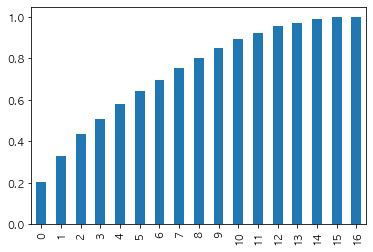

In [253]:
pd.Series(cum_ex_var_ra).plot(kind='bar')

In [254]:
data_pca_scaled.shape

(22400, 17)

In [255]:
# 최종 데이터셋을 가지고 학습, 평가 데이터 분리
# train : 1
# test :2
data_cust4.head(2)

CUST_ID  DIVIDED_SET  SIU_CUST_YN  SEX  AGE  RESI_COST  RESI_TYPE_CODE  \
0        1            1          0.0    2   47      21111            20.0   
1        2            1          0.0    1   53      40000            20.0   

   FP_CAREER  CUST_RGST CTPR OCCP_GRP_1 OCCP_GRP_2    TOTALPREM  MINCRDT  \
0          0   199910.0   충북      3.사무직        사무직  146980441.0      6.0   
1          0   199910.0   서울      3.사무직        사무직   94600109.0      1.0   

   MAXCRDT  ...  2_2 2_3 2_4  2_5  2_6  2_7  2_9  3_1  3_2  3_3 3_4  3_5  3_6  \
0      6.0  ...    0   0   0    0    0    0    0    0    0    4   0    0    0   
1      6.0  ...    0   0   0    0    0    0    0    0    0    3   0    0    0   

   3_7  3_9  
0    0    0  
1    0    0  

[2 rows x 55 columns]

In [256]:
train = data_cust4[data_cust4['DIVIDED_SET'] == 1].copy()
test = data_cust4[data_cust4['DIVIDED_SET'] == 2].copy()

In [257]:
# 두 개 이상의 컬럼 제외하기
# train.drop(['CUST_ID','DIVIDED_SET'], axis=1)
# train.drop(columns=['CUST_ID','DIVIDED_SET'])

In [258]:
train = train.loc[:, train.columns.difference(['CUST_ID', 'DIVIDED_SET'])]

In [259]:
test = test.loc[:, test.columns.difference(['CUST_ID', 'DIVIDED_SET'])]

In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 53 columns):
1_1                 20607 non-null int64
1_2                 20607 non-null int64
1_3                 20607 non-null int64
1_4                 20607 non-null int64
1_5                 20607 non-null int64
1_6                 20607 non-null int64
1_7                 20607 non-null int64
1_9                 20607 non-null int64
2_1                 20607 non-null int64
2_2                 20607 non-null int64
2_3                 20607 non-null int64
2_4                 20607 non-null int64
2_5                 20607 non-null int64
2_6                 20607 non-null int64
2_7                 20607 non-null int64
2_9                 20607 non-null int64
3_1                 20607 non-null int64
3_2                 20607 non-null int64
3_3                 20607 non-null int64
3_4                 20607 non-null int64
3_5                 20607 non-null int64
3_6                 20607 non-

In [261]:
train.columns

Index(['1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_9', '2_1', '2_2',
       '2_3', '2_4', '2_5', '2_6', '2_7', '2_9', '3_1', '3_2', '3_3', '3_4',
       '3_5', '3_6', '3_7', '3_9', 'AGE', 'AGE_GEN', 'CHLD_CNT', 'CTPR',
       'CTPR_2', 'CUST_INCM', 'CUST_INCM_2', 'CUST_INCM_3', 'CUST_RGST',
       'FP_CAREER', 'JPBASE_HSHD_INCM', 'LTBN_CHLD_AGE', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'MAXCRDT', 'MAX_PAYM_YM', 'MAX_PRM', 'MINCRDT',
       'OCCP_CODE', 'OCCP_GRP_1', 'OCCP_GRP_2', 'RCBASE_HSHD_INCM',
       'RESI_COST', 'RESI_TYPE_CODE', 'SEX', 'SIU_CUST_YN', 'TOTALPREM',
       'VLID_HOSP_OTDA', 'WEDD_YN'],
      dtype='object')

In [262]:
# 독립변수, 종속변수 분리
train_x = train.drop('SIU_CUST_YN',axis=1).copy()
train_y = train['SIU_CUST_YN'].copy()

test_x = test.drop('SIU_CUST_YN',axis=1).copy()

In [263]:
'SIU_CUST_YN' in train_x.columns

False

In [264]:
# XGBoost 모델을 사용하여 보험 사기자 예측 수행
# data_cust4.select_dtypes('object')

In [265]:
train_x.isnull().sum()

1_1                     0
1_2                     0
1_3                     0
1_4                     0
1_5                     0
1_6                     0
1_7                     0
1_9                     0
2_1                     0
2_2                     0
2_3                     0
2_4                     0
2_5                     0
2_6                     0
2_7                     0
2_9                     0
3_1                     0
3_2                     0
3_3                     0
3_4                     0
3_5                     0
3_6                     0
3_7                     0
3_9                     0
AGE                     0
AGE_GEN                 0
CHLD_CNT                0
CTPR                  575
CTPR_2                  0
CUST_INCM            4823
CUST_INCM_2             0
CUST_INCM_3             0
CUST_RGST             419
FP_CAREER               0
JPBASE_HSHD_INCM      616
LTBN_CHLD_AGE           0
MATE_OCCP_GRP_1     10885
MATE_OCCP_GRP_2     10885
MAXCRDT     

In [266]:
# 
train_x.isnull().sum()[train_x.isnull().sum() > 0].index

Index(['CTPR', 'CUST_INCM', 'CUST_RGST', 'JPBASE_HSHD_INCM', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'MAX_PAYM_YM', 'MAX_PRM', 'OCCP_GRP_2'],
      dtype='object')

In [267]:
train_x['CTPR_2'].sample(5)

10578    10.0
12036     6.0
798       3.0
9046     10.0
21751    11.0
Name: CTPR_2, dtype: float64

In [268]:
train_x.select_dtypes('object')

CTPR MATE_OCCP_GRP_1 MATE_OCCP_GRP_2 OCCP_GRP_1 OCCP_GRP_2
0       충북           3.사무직        2차산업 종사자      3.사무직        사무직
1       서울            1.주부              주부      3.사무직        사무직
2       서울             NaN             NaN      5.서비스   2차산업 종사자
3       경기             NaN             NaN      2.자영업   3차산업 종사자
4       광주           3.사무직          고위 공무원      2.자영업   3차산업 종사자
5       충남            1.주부              주부      3.사무직     고위 공무원
6       서울             NaN             NaN      5.서비스   3차산업 종사자
7       서울           2.자영업        3차산업 종사자      2.자영업        자영업
8       서울           4.전문직             공무원      4.전문직        공무원
9       서울           4.전문직              교사      4.전문직    대학교수/강사
10      경기           5.서비스        예체능계 종사자      6.제조업        운전직
11      서울            1.주부              주부      3.사무직        사무직
12      전북           3.사무직             사무직       1.주부         주부
13      대구            1.주부              주부      5.서비스   2차산업 종사자
14      경기           3.사무직          단순 사무직      5.서비스   2차산업 종사자
15      경기            1.주부              주부      2.자영업        자영업
16      경기           5.서비스        3차산업 종사자      2.자영업        자영업
17      경북             NaN             NaN       1.주부         주부
18      경기           2.자영업             자영업      2.자영업   3차산업 종사자
19      대구           5.서비스        3차산업 종사자      5.서비스   3차산업 종사자
20      부산           3.사무직             사무직      2.자영업        자영업
21      경기           5.서비스        예체능계 종사자       1.주부         주부
22      광주           2.자영업             자영업      2.자영업   3차산업 종사자
23      서울           4.전문직              교사      6.제조업        운전직
24      인천           2.자영업        3차산업 종사자      3.사무직        사무직
25      울산           5.서비스        2차산업 종사자      3.사무직        공무원
26      대구            8.기타        3차산업 종사자       1.주부         주부
27      부산             NaN             NaN      2.자영업        자영업
28      서울           5.서비스        3차산업 종사자       1.주부         주부
29      경남           2.자영업             자영업       8.기타     단순 노무직
...    ...             ...             ...        ...        ...
22363   전북             NaN             NaN       8.기타         학생
22364   경기             NaN             NaN       8.기타         학생
22365   서울             NaN             NaN       8.기타         학생
22366   전남             NaN             NaN       8.기타         학생
22368   부산             NaN             NaN       8.기타         학생
22369   대구             NaN             NaN       8.기타         학생
22370   대전             NaN             NaN       8.기타         학생
22371   대구             NaN             NaN       8.기타         학생
22373   서울             NaN             NaN       8.기타         학생
22374   인천            1.주부              주부      3.사무직        사무직
22375   경기             NaN             NaN       8.기타         학생
22376   전남           3.사무직             사무직      6.제조업   1차산업 종사자
22377   경북             NaN             NaN      3.사무직        사무직
22378   강원             NaN             NaN       8.기타         학생
22379   인천             NaN             NaN       8.기타         학생
22380   경기             NaN             NaN       8.기타         학생
22381   광주             NaN             NaN      4.전문직    의료직 종사자
22384   광주             NaN             NaN       1.주부         주부
22385   전남             NaN             NaN       8.기타         학생
22386   대구            1.주부              주부      2.자영업        자영업
22387   경기             NaN             NaN       8.기타         학생
22389   경기             NaN             NaN       8.기타         학생
22390   서울             NaN             NaN       8.기타         학생
22391   광주            1.주부              주부      2.자영업        자영업
22393   서울             NaN             NaN       8.기타         학생
22394   경남           3.사무직        3차산업 종사자      5.서비스   3차산업 종사자
22396   경기             NaN             NaN       1.주부         주부
22397   경기             NaN             NaN       8.기타         학생
22398   경기             NaN             NaN       8.기타         학생
22399   경기             NaN             Na

In [269]:
from xgboost import XGBClassifier
# 문자형 범주 데이터 X
# 1.LabelEncoding
# 2.결측치 제거가 필요

In [270]:
train_x[['CTPR','CTPR_2']].head(2)

CTPR  CTPR_2
0   충북     1.0
1   서울     2.0

In [271]:
# CTPR , MATE_OCCP_GRP_1의 범주형 데이터를 입력 데이터로 포함
train_x.select_dtypes('object')

CTPR MATE_OCCP_GRP_1 MATE_OCCP_GRP_2 OCCP_GRP_1 OCCP_GRP_2
0       충북           3.사무직        2차산업 종사자      3.사무직        사무직
1       서울            1.주부              주부      3.사무직        사무직
2       서울             NaN             NaN      5.서비스   2차산업 종사자
3       경기             NaN             NaN      2.자영업   3차산업 종사자
4       광주           3.사무직          고위 공무원      2.자영업   3차산업 종사자
5       충남            1.주부              주부      3.사무직     고위 공무원
6       서울             NaN             NaN      5.서비스   3차산업 종사자
7       서울           2.자영업        3차산업 종사자      2.자영업        자영업
8       서울           4.전문직             공무원      4.전문직        공무원
9       서울           4.전문직              교사      4.전문직    대학교수/강사
10      경기           5.서비스        예체능계 종사자      6.제조업        운전직
11      서울            1.주부              주부      3.사무직        사무직
12      전북           3.사무직             사무직       1.주부         주부
13      대구            1.주부              주부      5.서비스   2차산업 종사자
14      경기           3.사무직          단순 사무직      5.서비스   2차산업 종사자
15      경기            1.주부              주부      2.자영업        자영업
16      경기           5.서비스        3차산업 종사자      2.자영업        자영업
17      경북             NaN             NaN       1.주부         주부
18      경기           2.자영업             자영업      2.자영업   3차산업 종사자
19      대구           5.서비스        3차산업 종사자      5.서비스   3차산업 종사자
20      부산           3.사무직             사무직      2.자영업        자영업
21      경기           5.서비스        예체능계 종사자       1.주부         주부
22      광주           2.자영업             자영업      2.자영업   3차산업 종사자
23      서울           4.전문직              교사      6.제조업        운전직
24      인천           2.자영업        3차산업 종사자      3.사무직        사무직
25      울산           5.서비스        2차산업 종사자      3.사무직        공무원
26      대구            8.기타        3차산업 종사자       1.주부         주부
27      부산             NaN             NaN      2.자영업        자영업
28      서울           5.서비스        3차산업 종사자       1.주부         주부
29      경남           2.자영업             자영업       8.기타     단순 노무직
...    ...             ...             ...        ...        ...
22363   전북             NaN             NaN       8.기타         학생
22364   경기             NaN             NaN       8.기타         학생
22365   서울             NaN             NaN       8.기타         학생
22366   전남             NaN             NaN       8.기타         학생
22368   부산             NaN             NaN       8.기타         학생
22369   대구             NaN             NaN       8.기타         학생
22370   대전             NaN             NaN       8.기타         학생
22371   대구             NaN             NaN       8.기타         학생
22373   서울             NaN             NaN       8.기타         학생
22374   인천            1.주부              주부      3.사무직        사무직
22375   경기             NaN             NaN       8.기타         학생
22376   전남           3.사무직             사무직      6.제조업   1차산업 종사자
22377   경북             NaN             NaN      3.사무직        사무직
22378   강원             NaN             NaN       8.기타         학생
22379   인천             NaN             NaN       8.기타         학생
22380   경기             NaN             NaN       8.기타         학생
22381   광주             NaN             NaN      4.전문직    의료직 종사자
22384   광주             NaN             NaN       1.주부         주부
22385   전남             NaN             NaN       8.기타         학생
22386   대구            1.주부              주부      2.자영업        자영업
22387   경기             NaN             NaN       8.기타         학생
22389   경기             NaN             NaN       8.기타         학생
22390   서울             NaN             NaN       8.기타         학생
22391   광주            1.주부              주부      2.자영업        자영업
22393   서울             NaN             NaN       8.기타         학생
22394   경남           3.사무직        3차산업 종사자      5.서비스   3차산업 종사자
22396   경기             NaN             NaN       1.주부         주부
22397   경기             NaN             NaN       8.기타         학생
22398   경기             NaN             NaN       8.기타         학생
22399   경기             NaN             Na

In [272]:
train_x.describe(include='object')

CTPR MATE_OCCP_GRP_1 MATE_OCCP_GRP_2 OCCP_GRP_1 OCCP_GRP_2
count   20032            9722            9722      20607      20060
unique     17               8              24          9         25
top        경기            1.주부              주부       8.기타         주부
freq     4818            2203            2210       4514       4415

In [273]:
# 경기
train_x['CTPR'].value_counts() 

경기    4818
서울    3389
경남    1462
부산    1390
인천    1334
전남    1036
대구     909
경북     896
전북     892
광주     797
충남     693
울산     645
충북     570
강원     524
대전     466
제주     174
세종      37
Name: CTPR, dtype: int64

In [274]:
train_x['CTPR'].fillna('경기', inplace=True)

In [275]:
# 9.무직
train_x['MATE_OCCP_GRP_1'].value_counts()

1.주부      2203
3.사무직     1888
5.서비스     1420
2.자영업     1289
6.제조업     1042
4.전문직      988
8.기타       579
7.1차산업     313
Name: MATE_OCCP_GRP_1, dtype: int64

In [276]:
train_x['MATE_OCCP_GRP_1'].fillna('9.무직', inplace=True)

In [277]:
train_x[['CTPR' , 'MATE_OCCP_GRP_1']].isnull().sum()

CTPR               0
MATE_OCCP_GRP_1    0
dtype: int64

In [278]:
test_x['CTPR'].fillna('경기', inplace=True)
test_x['MATE_OCCP_GRP_1'].fillna('9.무직', inplace=True)

In [279]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['CTPR' , 'MATE_OCCP_GRP_1']:
    train_x[col] = encoder.fit_transform(train_x[col])
    test_x[col] = encoder.fit_transform(test_x[col])

In [280]:
train_x[['CTPR' , 'MATE_OCCP_GRP_1']].describe()

CTPR  MATE_OCCP_GRP_1
count  20607.000000     20607.000000
mean       6.105304         5.431649
std        4.689916         3.074802
min        0.000000         0.000000
25%        1.000000         2.000000
50%        6.000000         8.000000
75%       10.000000         8.000000
max       16.000000         8.000000

In [281]:
train_x.isnull().sum()

1_1                     0
1_2                     0
1_3                     0
1_4                     0
1_5                     0
1_6                     0
1_7                     0
1_9                     0
2_1                     0
2_2                     0
2_3                     0
2_4                     0
2_5                     0
2_6                     0
2_7                     0
2_9                     0
3_1                     0
3_2                     0
3_3                     0
3_4                     0
3_5                     0
3_6                     0
3_7                     0
3_9                     0
AGE                     0
AGE_GEN                 0
CHLD_CNT                0
CTPR                    0
CTPR_2                  0
CUST_INCM            4823
CUST_INCM_2             0
CUST_INCM_3             0
CUST_RGST             419
FP_CAREER               0
JPBASE_HSHD_INCM      616
LTBN_CHLD_AGE           0
MATE_OCCP_GRP_1         0
MATE_OCCP_GRP_2     10885
MAXCRDT     

In [282]:
train_x.columns

Index(['1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_9', '2_1', '2_2',
       '2_3', '2_4', '2_5', '2_6', '2_7', '2_9', '3_1', '3_2', '3_3', '3_4',
       '3_5', '3_6', '3_7', '3_9', 'AGE', 'AGE_GEN', 'CHLD_CNT', 'CTPR',
       'CTPR_2', 'CUST_INCM', 'CUST_INCM_2', 'CUST_INCM_3', 'CUST_RGST',
       'FP_CAREER', 'JPBASE_HSHD_INCM', 'LTBN_CHLD_AGE', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'MAXCRDT', 'MAX_PAYM_YM', 'MAX_PRM', 'MINCRDT',
       'OCCP_CODE', 'OCCP_GRP_1', 'OCCP_GRP_2', 'RCBASE_HSHD_INCM',
       'RESI_COST', 'RESI_TYPE_CODE', 'SEX', 'TOTALPREM', 'VLID_HOSP_OTDA',
       'WEDD_YN'],
      dtype='object')

In [283]:
train_x = train_x._get_numeric_data()
test_x = test_x._get_numeric_data()

In [284]:
# 모델 평가
# 정답 데이터를 사용하여 예측값과 score 산출
answer_y = pd.read_csv('answer.csv')
answer_y

CUST_ID  SIU_CUST_YN
0          37            0
1          51            0
2          60            0
3          65            0
4          73            0
5         101            0
6         106            0
7         116            0
8         123            0
9         125            1
10        137            0
11        139            0
12        161            0
13        179            0
14        196            0
15        202            0
16        204            0
17        215            0
18        239            0
19        240            0
20        241            0
21        252            0
22        269            0
23        285            0
24        297            0
25        307            0
26        318            0
27        321            1
28        344            0
29        353            0
...       ...          ...
1763    22085            0
1764    22086            0
1765    22105            0
1766    22110            0
1767    22111            0
1768    22117            0
1769    22121            0
1770    22126            0
1771    22139            0
1772    22151            0
1773    22163            0
1774    22164            0
1775    22187            0
1776    22214            0
1777    22225            0
1778    22258            1
1779    22263            0
1780    22271            0
1781    22272            0
1782    22286            0
1783    22291            0
1784    22294            0
1785    22295            0
1786    22304            0
1787    22305            0
1788    22320            0
1789    22328            1
1790    22329            0
1791    22342            0
1792    22383            1

[1793 rows x 2 columns]

In [285]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20607 entries, 0 to 22399
Data columns (total 48 columns):
1_1                 20607 non-null int64
1_2                 20607 non-null int64
1_3                 20607 non-null int64
1_4                 20607 non-null int64
1_5                 20607 non-null int64
1_6                 20607 non-null int64
1_7                 20607 non-null int64
1_9                 20607 non-null int64
2_1                 20607 non-null int64
2_2                 20607 non-null int64
2_3                 20607 non-null int64
2_4                 20607 non-null int64
2_5                 20607 non-null int64
2_6                 20607 non-null int64
2_7                 20607 non-null int64
2_9                 20607 non-null int64
3_1                 20607 non-null int64
3_2                 20607 non-null int64
3_3                 20607 non-null int64
3_4                 20607 non-null int64
3_5                 20607 non-null int64
3_6                 20607 non-

In [286]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [287]:
pred_y = xgb.predict(test_x)

In [288]:
pred_y.shape

(1793,)

In [289]:
pred_y = pd.Series(pred_y)

In [290]:
answer_y.shape

(1793, 2)

In [291]:
final_result = pd.concat([answer_y, pred_y], axis=1)

In [292]:
final_result.columns = ['CUST_ID', 'ANSWER', 'PRED']

In [293]:
final_result.head(2)

CUST_ID  ANSWER  PRED
0       37       0   0.0
1       51       0   0.0

In [294]:
# score : accuracy
xgb.score(test_x, final_result['ANSWER'])

0.8722810931399888

In [295]:
# confusion-matrix, f1-score
from sklearn.metrics import confusion_matrix, f1_score
# 정답, 예측값
confusion_matrix(final_result['ANSWER'], final_result['PRED'])

array([[1557,   78],
       [ 151,    7]])

In [296]:
# 정답, 예측값
f1_score(final_result['ANSWER'], final_result['PRED'])

0.05761316872427984

In [297]:
# 결과 해석
len(xgb.feature_importances_)

48

In [298]:
xgb.feature_importances_

array([0.        , 0.06198592, 0.01814616, 0.02418537, 0.04281904,
       0.01440723, 0.        , 0.        , 0.        , 0.03383452,
       0.        , 0.01812091, 0.01259379, 0.01298314, 0.        ,
       0.        , 0.02209458, 0.09141435, 0.01208567, 0.        ,
       0.01429969, 0.01626952, 0.        , 0.        , 0.0336148 ,
       0.00964064, 0.02973855, 0.02563552, 0.0328152 , 0.0079742 ,
       0.        , 0.01857433, 0.        , 0.00844669, 0.01628002,
       0.00252038, 0.03727593, 0.02386421, 0.01742855, 0.01838809,
       0.0253838 , 0.01012032, 0.0104575 , 0.01003462, 0.02777282,
       0.02785823, 0.2093803 , 0.00155544], dtype=float32)

In [299]:
len(train_x.columns)

48

In [300]:
xgb.feature_importances_.shape

(48,)

In [301]:
feature_df = pd.DataFrame(xgb.feature_importances_.reshape(1,-1), columns=train_x.columns)

In [302]:
feature_df.values > 0.3

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [303]:
# 제거 대상 컬럼 관리
# 데이터 버전 관리
data_cust4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 0 to 22399
Data columns (total 55 columns):
CUST_ID             22400 non-null int64
DIVIDED_SET         22400 non-null int64
SIU_CUST_YN         20607 non-null float64
SEX                 22400 non-null int64
AGE                 22400 non-null int64
RESI_COST           22400 non-null int64
RESI_TYPE_CODE      22400 non-null float64
FP_CAREER           22400 non-null int64
CUST_RGST           21944 non-null float64
CTPR                21779 non-null object
OCCP_GRP_1          22400 non-null object
OCCP_GRP_2          21805 non-null object
TOTALPREM           22400 non-null float64
MINCRDT             22400 non-null float64
MAXCRDT             22400 non-null float64
WEDD_YN             22400 non-null float64
MATE_OCCP_GRP_1     10573 non-null object
MATE_OCCP_GRP_2     10573 non-null object
CHLD_CNT            22400 non-null float64
LTBN_CHLD_AGE       22400 non-null float64
MAX_PAYM_YM         15914 non-null float64
MAX_P